# Chains in LangChain

In LangChain, "chains" refer to sequences of modular components (like LLMs, APIs, or custom functions) that are linked together to perform complex tasks. Chains allow you to structure and manage the flow of data and decisions through these components, enabling more sophisticated and contextually aware AI applications.

## Outline


- **LLMChain**: A basic chain that connects a language model (LLM) with a prompt template and a memory module, facilitating simple, single-step tasks like generating text based on input.
- **Sequential Chains** : Chains that execute a series of steps in order. 
  - **SimpleSequentialChain** (Linear | Single input, single output): A straightforward chain where each step's output is passed directly as the input to the next step in sequence.  
  - **SequentialChain** (More like a tree | Multiple inputs, Multiple outputs): A more flexible version of SimpleSequentialChain, allowing for more complex dependencies between steps, such as using outputs from multiple steps as inputs for a later step.
- **Router Chain**: A chain that dynamically selects which chain to execute based on the input, often used for complex workflows where different paths might be taken depending on the initial input.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [3]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [4]:
#!pip install pandas

In [5]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [6]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...


## LLMChain

In [7]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [8]:
llm = ChatOpenAI(temperature=0.9, model=llm_model)

In [9]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

In [10]:
chain = LLMChain(llm=llm, prompt=prompt)

In [11]:
product = "Queen Size Sheet Set"
chain.run(product)

'Royal Comfort Bedding Co.'

## SimpleSequentialChain

In [12]:
from langchain.chains import SimpleSequentialChain

In [13]:
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [14]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [15]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [16]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
"Royal Dream Linens"
"Royal Dream Linens offers luxurious bedding and home decor items that bring elegance and sophistication to any bedroom or living space."

> Finished chain.


'"Royal Dream Linens offers luxurious bedding and home decor items that bring elegance and sophistication to any bedroom or living space."'

## SequentialChain

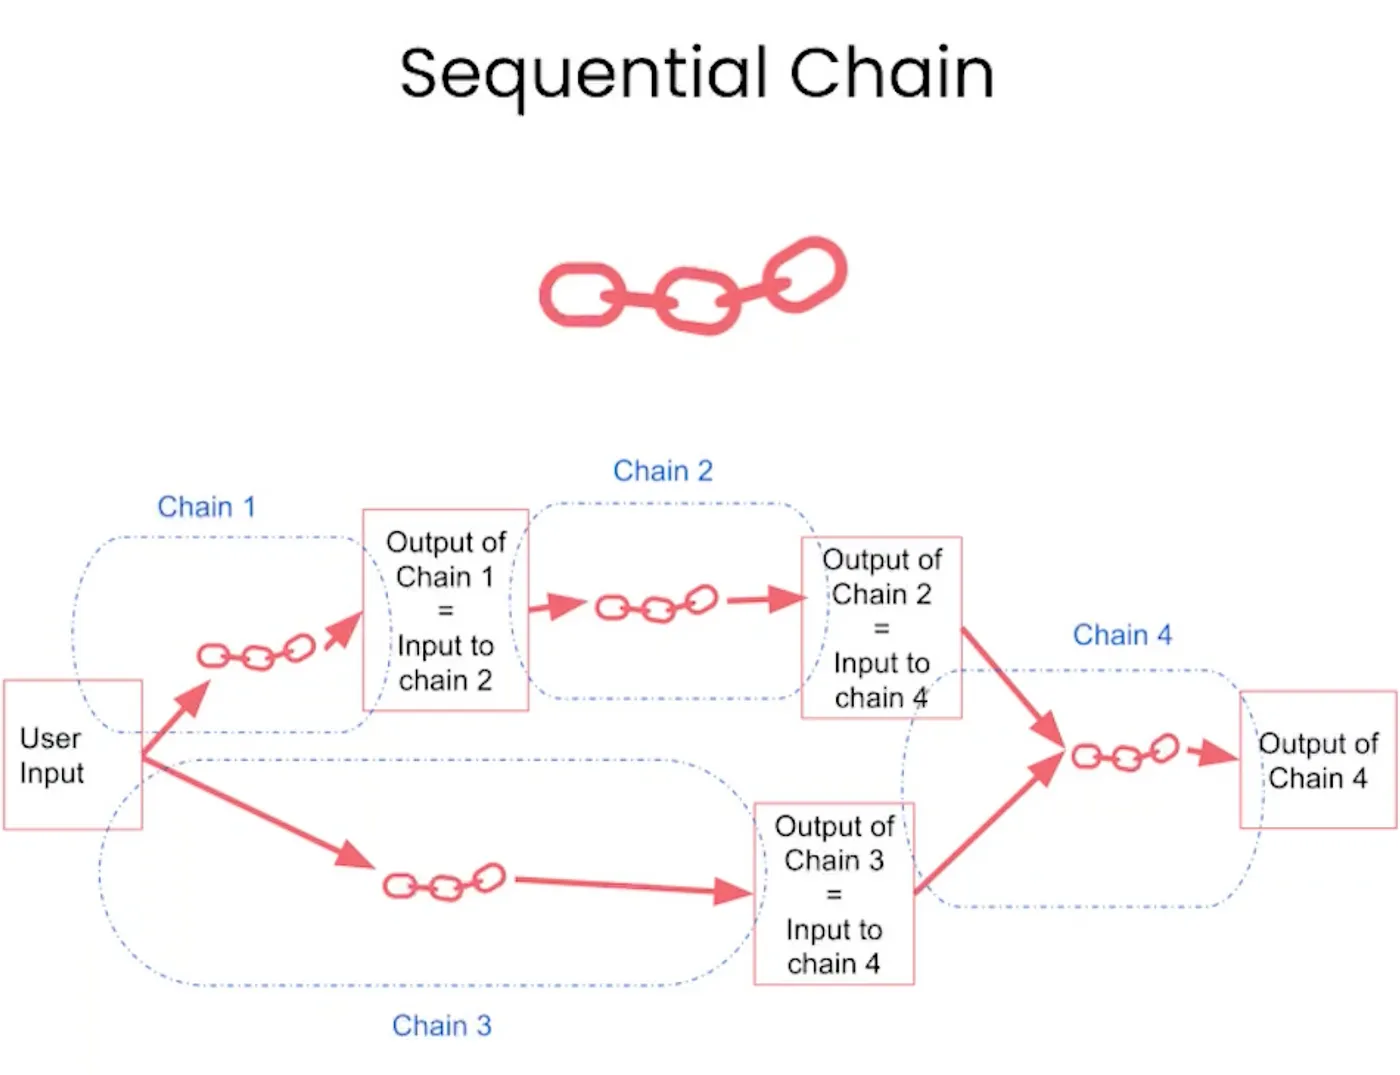

In [42]:
from IPython import display
from base64 import b64decode
base64_data = "UklGRpyRAABXRUJQVlA4WAoAAAAIAAAAdwUAMgQAVlA4IPiQAADwngOdASp4BTMEPm02mUikJiKhIpMJGMANiWdu/BgR3Z+BL191nG5D/3scnJ+jG69y/D/1e+/kP3v/G/zn7i/4D4COM+5j2D9+/Wf9m+cHDI58/u+Yl0H/6f8x/jvdh/2P+j7Qv17/3Pz////2D/pt/0/63/hfba/ZT4Gf4f/yeov+x/8r93fdw/8X7j+/r+3+px/Tv+j//+x69ETzdf/d7R/7m/uh7N///1mz0l/s/TP8j/cP85/gP3S/v/qX+RfTf43+8/5T/cf4f3M/+PyQdg/9/0M/lv4K/df3/95f8v8wv6r/uf57yJ+Sn+T/mvyy+Qv8l/on+t/u/5N8blwXmHe3/5v9m/JI/5PVb9X/3//o9Y/+I/8fKC0Df1p6s3+v/9/99+Z3w9+vf/b/s/9R8i37D/98RAps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjYepoC/0FPbLyi2BHU/csFvx7siLFEAmIIcDoI6Tz/1KfIt05zqkko3NsvKbOqSSjc2y8ps6pJKNzbLymxw9glf9N+zf90RdhUwRcfSBit9fiaTiy3fUBXcqnrsu11rgmwuMq5JFd5d0tzecYNLHcJO5c1dUHfR/SmLnp2S4QP1cJ1k6lG/HHkW9HBMMMh2N97D6G7fQM59/NCX+NGUOc/eUtu9OfNIPImVV8yvkfTnOuAk/SXd1EjF9llEDgGmNlac0AHgugzjtd9rOlG5tl5TZ1SSUbm2XlNnVJJRubZeU2fNA/oZ8Z3AeZvNpn34GmJjSBngOnDkhvYM9SiBXhLAv3d0cAGgo4Nro7uzSMJPjZpVBgkBrQHYlFX/yC/+W6AAxT8HX/wiGOVGZzRH+lTl7ema2qYR2+3qmgkkVE0peQBnqrCV+2jF2UGnzyb7SyaozwR0dPolqrsZvbfXNDd8UpatZrEIYQ8r2b08FlRo3NsvKbOqSSjc2y8ps6pJKNzbLymz5jcgT7EBo++SeK9mCvgEn2ei6/rZVOCDqwFvQxFajvOIfGG1NetGJA/YAlBK8axtVlvDy09+uLuXYkmm9quEVrrqWH4AjIHO8p/g2ezyO7a7ow5tBn3MKaqgPRlUrVOZw0QIccpz49BIHHxcGbIZLe4PhakUsUPzeXwTQR+YzUMtOn0bF4vzY25GYl+u0NyJ8NmcVJs6pJKNzbLymzqkko3NsvKbOqSSjc2y5KMExTwBnGQMP9n2jl23vHSahe5UUQIKm8llbDbzlMEYGCPQQEN9AGcRrAUOOe8gItQVRG69BtoX10E+YHIG4uDU/CDWqaHHVjgrjAHYHyAllXUJHjYe2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbmmNSLMZ62XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubVQpd74iVClzNqbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzRVzeSns0pdG/SpWG2unAYGl84rOq2pXFRT2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pGaZWzi16VHauRspTLW+QVyU/sgQ6I/4U9wokIa7L04ZQJERi5gottgss5a7UpgccVp795koJz/QU9svKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOGNACh6lMtu5lzFaNnJyINT4hHJt009zCcXDRkNatXwNnubbKUSgujLS/VKCYWjvdGMDA+Ac5IRslgRjUwQwzBC87tLIoKp68bqv58hPTs1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XGBE8G4zCZnTYZl2KcflQeJoeQSRTvSw8/dKBI26JSWwlN21Rn1KqRAJTPhuKFbIGscyhsjzPcNEYpBb4kUKxhvj/7wZEzbd4nFRKxg+xubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUivV6VB277FnnZu/RLBm/kR/MPHev3oyckFjE7URuPRijfNi41+5mkHlQaFldWkh9O0eO7CHM0+ei2I0usOOibIlEO6IxoE6CyxjOt5f21XmFKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkVrVi69Aa9TAf7h3Y7Ox8As5cvDmDVS5lxPxCfxSg/y+yEuxnCOz5Udwzbjo7jj9urrAH5R6IKe2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJSt4pTZJfkoGQs1BKthh3OqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqhoEdo8i+nz05Eey3ZVujt8mjWy8ps6pJKNzbLymzqkko3NsvKbOqSSjc2y8ps6pJKNzbLymzqhdUip0LmeeUIsYA+Y15NNvp4esDI9/qA4Po7n57qBU7tDKt+aQZGxYQWk3Eps6pJKNzbLymzqkko3NsvKbOqSSjc2y6WPTZ+N4C/Sjc2y8ps6pJKNXSQWOZGoF87tb93vSgzdpDEzQJaiFPbLymzqkko3NsvKbOqSSjc2y8ps6pI7df4IrYhMOhGj6sQ4wBLXMGNTOcmJY+7DOgnZB8rB6fF86aKJB67i+NPVCoVCoVCoVCoT+1Qt8bvYJT4Em+uMp895KOslFcIIrkPcga/g33rWSfYRYp294FIvTRqVWMA6Ehf/V0afpDbOrnsxaVKyIoSjte5sIfsXI0UzwO51SSUbm2XlNnVJJRubZeU2dUkkijxHS3nmQ4HqcZsoms1WCUOcfMZ1aff18U9Lo14IjtUoKdwRDoAOkn3u5oKOlIt+1gxYvljG7znhgBFjzZWnk72P+m2XlNnVJJRubZeU2dUklG5tl5Q2MypR4lcJDSUwEpraHaw2WAfQSJ2sgkrJlt/ikvnotPKpirf5nBBdGJiGh6ZCcvPeqc4cZJFHMI1zVaEgsMrBgno0gjbUwx/x5DLnQ+ASaxWxaCTrStNOfQ/6Nwq3pjY53bvV0ilWrXerGR9fJH1jDudUklG5tPVG7DDgFoc9JFjMbVisVisVisViloRf9Gjc2y8ps6pJKNzbLymzl5iWVEmxDnG1ElvNRL9KsHneaGS4uZ4kTpedH+nkUrNVN7X1GaM9qmtBYHu/xz0o8vAa0M9J5qjWSre1NGMFu27Pns10pc/qTpRubZeU0E7VKfNQv+4p0ivqFPJxDmSMpzWule2dtKcDE4K11fRAun4kiq2S+vV1t/dXhHdrZeU2dUklG5tl5TZ1RHloTeOY29KNzbLymyJJECkPyEbqVBEV0YMRv/33cS4z2YDNf9ZfmRJIjIw85MGAeIrtq1DzI1oGxlh4qOLpAcvk/0FPbLyiydfKqScnL8EcObC5h8Mq+aX8MVU4J5AoyUEIThEC4PmO0mZNeM1lhFPDFL3GG3F/gdzqkko3NsvKbOqRnDCe2X5TZ1SSUbmnHEaXTE5EF2uRZ0ZjnssJDcryzG/NhIhp4u+557PWz0iFxqiEIuhtLveRWhjyTSgB+x5qAgXKen6T+n0utnp7fyHYjrw7sRlr/3esboRu2wIZs4S/imM6xO3ZIqFNxXtg56PRs/53GbczCj/pk5/KC/5qF+3UnSjc2y8ps6pJKNzbLyh+ubDdXP8DudUklEuXgWGvhLLouG9sw6VRqvvAYCioo19mC1iwQloMQvQbvrJznmi+OlCan03PvIZLp/zowIqNc3BfETRy3VPuWxpREFxcbxkJ7aZdlsQCAhsMPFeLAcMRKml7Tcvs6JlKlbv3TGwr/Av4uCrOGw6GycXfF+R7yL9tJE//rh6weWFViDx1L8Pf4grwBzI3JupI/oWtzbr9gXihomm2XlNnVJJRubZeU2dUi7SoltbLymzqkZps9/2hMVV2mAJtU/2rtKLMEbWK+yezVW5PZe+ri0aZTi3amKnx7SDeziGLu+WQIAOhaqKZViDgmn78Rj7GtJFcKCKscxro+MpcrVDHo7DVwIrz4IGEqZTySGxd7EK3ymnB4xCxMVdkXFdSOBBFAnn7DYAf0E1zwkO6wVpZg2Htl5TZ1TFgrMGLOvsv79UDsCYZu6StxewEAAbPNPLkc1sv6+3kRrtLnRLBnyxL556/cemGXA3rgqxrCJlt7AAEeDbN6wkFRmYTnjvcTP1M0AscrdPkDrnjx1g5xEQFGyxlbLmlAvBTWlBeDE/z0injE+BrC4DgGhWJO3OMuvWFagcMs756hCQLcohNVpEaSZCSSjc2y8psgS7Vw9DyO0o3FaLqpe1gbSZE3NxRbHN7IyfD6sdspRYYA8Np9NRn8OvIfYTOUC6MStwGhTcERuA9qA7eVVlcBA+sODNqSqWQkmsUOBhLqXruo7aIboX0DENwUedCliBdNSc0ZRbQ81BYGYetKbxSNIMpvrdvaauzVJJRubaOJDTiTg/BcJYFIxJWTs2Ghf6LVtQ8vVW99zmjMuMsgxocVg9JswBWnLlqjtmam2V/YHjtJ14aI6m65jov8DudUklG41thmhrTVIzTz6Yqyx/EK/t7dIpTCei3WRCP2Yt49qPjb0oJb4uz9ManTZHEHRLMUfIAv1HfQZiEO1GXWySPAAG8gG5eUn/iGxglcnDc3S14k4LLT4/0K/wO51SSUdGs71Hmf7lSlNNbH201KgzLEtkthLj3S0d7EilRy72tvCKG11gPKoCcd4+i7AFkOR3vWno7Ys3CXp25w36vzglXb6zZXQO3BezUE56IrSr9Oaqw8/SI7jy8nn4Uo3NsvGhMgjZlZZLI0GoAdjmGNivZOE5KgrL8aU5607WsjI7JUwMKoITfpfef/t7kz4T74GTQrSRBzy48McPjlgxvwqtA3AhmVB23TpvUfm+6Coau5LemGBnfPNQFjaZidBEN8k/0FPbLxv8Kyw1JFWi2UrQAlp0BqcB+XKRKdnw2/FxLvrnr+EMIpsBk17O7Us9KXPU9twZTxgHzTD045xn/x214D5CppZHY6CGRX75hRwfKn5vpfF62AMwY/UFjKSYdso6rR0cWOxGjc2y5khwjvwnV2hAk5iPHuYN43xi4pjdx2d6XKSSjcc7xKHoB6lJaHQapKeRHRZQSx+dGcoxKf0Eu7ooonkSUQipKrlNTRC6xegsXUrEwuIhONO5p1nBouR/bs9o/9iEZi/IJqBXW5fn53QYn1YFciX7b2zMeqoYcdxjzt7vp7+JArksWwWhYHxRETZ3NDgSY6UV4JPOCjbuxAVgm6uDWM5DhIlB0eDiLZb2ojFDZwLKnvydpAasc7JMIKjvkOXxFej488aDzPzyWYafwaKRmMxmMxmGkMfuhX9J6UGiuYMEkfLlGXzsmMO6ZdhmLPSqSGs69hGjcYLepqsaq3vp1b3nq/4NFIzF2FRtbtQm4RcaS+qV4QfYBmoq4d+NtnqWLmmN3KgLJnwkPwLKjDlm7Au5eIAx27hUvXzY3OTcQiSor5pmX5eGqQFIsK40voCNBsHQU9suUkehXQOieU2S7kg8z9AZWGrcufs+Vmhj3kc/srcTYpMyO2Eb6zzUUF4O5nbziv4XnEsheJ0LM1qVM9IM5hkBv0b4v41VmTko6do+6EWHzu/NXmzEgqgvnLvaP3CW39zkwpiHv3V44v3mc48LAI3znqrIOWdUklG5tlzekUhsBAzEeEHWv66HKCsGqj43Ne1lyyHxzjW69C89Zbzhrl7QMRT1ABV0Ci1u3H44J8bA+/BMlfQCYXg7IviXg8mGmbygXKbjD7HDUd6z+L9A5hARQ/PckwixygWJfrOGKTicdojCcMDcXuTiT+gO+PTfJ9fSkJ23sI0bm2XlNnVJJRubZch1l//hsvL3fMLxwCfdlxyTzs81xQb8IcXQec/c1oIdqPX1BZMPGmokztGFsH5w/pPLXMUgVl4qjRwudGapmapKMljdPi8oJYuWJCuChdv1MlWk0Lv8crnz7djeMUKjmmjPo6wpXzri7wJb6RwWYu3GlhMkFuITJr7crVTnY9oRr+o8F5InL7529tErv6ygWhv6Td1NPZJjJ1ml7AzuQUi52PNW82Byil4yvKmAbFhxYcBNDhdLWgtfNB5NOhMT/NKf5NC1/Zn+sdVVqJIpfS0aI4wulG0iIwLdvFLmQFYqKwjAKU8fAwNFlGrSq7fIzNpxmf0V6zlkpOWUCA7yTKemQlRde1foiXr2bVRKN07VMaliUCiQXllmDG2Xp81FAr0ICiNPGcgnvBXhmnF08Yd44e2XlM6tQ8+Q/an5sVnYn/5MMvnlCBb6jdqH8laFIFklwFr51f8IQ4+wHnEf40lapdJ6IC73/yq5egt2zcz6CAtW8cCUvC4r4Y53vAaCa5lfS+DeIe2TkdhhhD6aENqGqFlQlEbslQEOkUOp62sJRRgivAPkXRTdLROSaRvkiaakEVqesLL7mfJ7vSaT+qlHeJkN/yk4pMf7mOoiUWLxD92VOOv3jdewGThZ6P9gFP58ocGFPbYU7av7H4Qh8UosJ7G1lMrltbLymyCluX9+nSiWVqg4Fq2jL+DnYEKupZSb1GHl/AAMA6aHkwcxlpv+4XzA4VrBa3TaLprlGFlm57h2CP/6RNWSHRcXcOwOrSbuLvIfi0Agc2U1+GpEk0Pgic/rDeyx6ah7uEg2WtRzpo4JvP+h6zVoVy59DhedsPbLymzqkko3NsvKc6dfMxISQ0O+d+m+XTdS6LX/rfYGqmJ82daP3p/7J3GAJ5k6XuhIyB1JOm4xhGw0TImoxa05t24vGCaTK4cp7NpoN1C2D+w+gprFYOoRty32hVE+8BUcLoLrDu2Z35mtMwbD2y8ps6pJKNzbLkcg90oIit+V1nWx8rZnS89y+r7hDd8HmFUqLyNYGn415bKvrjpYhLncJspI3C+jTKcsow3wft1z1Qz74HXzOCUpM8HSUbjnc+a6y/eXCfTMAkKLHrWqFFkA2WDO0q2zqEbF+GaSOsA6Aq468TqN3f6u3eN1FrZeU2dUklG5tmBYYy30ty91PNdcvYXrgfUIxNWqEAb7ZDf5NjqYaHCpW/k4FVbWJuMrUbKdqNLC+yAhDkiFRo8iA0v14uaHhfKlQDue004e1EcN1i1mqMGuJoyDPPyRyyWSyWSyO0WRHzUnwyApPTA7MxnzFi2/psJcYCla8fJQvsvijlAaWK1l792AQptl5TZ1SSUbm2XjIQ/xU8PGRfuhj/+qZYxrf0lpwDhdW3bOFFSur9bOyxnYQVjL5lkbQO1uKIaeyYZw7gd3GzYyg2JCdrZeU2dUlJiKNJfrxPiFZB6IlxJJRC2/zqkko3Np9+PEXrrmWjM6YJHZ1R7DuR2ZqqxWko3NsvKbcGC+mDPpsZJpCj+HzMvtav5SxcaQizQLKdBf83klYoVCR/Ij7xU0gyqnaFjQs0PGqKq36OKItGe2AIDcMY2asIqixovKbOqSSjXqJ4tKZsOL/A7nVJHfT1RUpkQA2TE9svGXWCbz5ATyIF9LdCv59fThrHHU/H+Ylt3elnTf0+/1apudmuiSWf6m0x/fkB2Qk6UG7XaxSqDTfRPxNjuRiCqLahTkx+otjX0R2PGGdFeXMJ375p24FdgZ/9+mcMY46WrNBe5DrLg94PZwMT5mjCop0gmhTtU9svKbOqSSdno5PYtmqSSjc2yPKyrg7nVJJRubZHLXaa+MTFigZdWYo+24zYDEpgRMn9khlF41jwJs/ih79iOgBdGsvZTpegT1rL1NXue0rDFuSMMMcnbpeqSIm7vMvdBH+P6FhV3GBDiFzpU7UfXhvX8c8AaIJgX+z5YF5B6VQJfHE7lskrfzjz0jCjbXRRs66w2E3NoLAbf5SIYn8I9FnWoIT01IPGHJgV35lMs2Dh7ZeU2dPoioBsdZ1DVCSSjc2y8Z9BbHaPMv+JTZ1SR8PHdjLkK+UcLz33MqEbJa1bAIxmFPd21u2MAYep+XXtJ/1l2L/Jv/vUbwC/Rotu6023XoHXMHJQnpA8/UXVbIEtcQG6/50fXNxhDcPmzq11lsLWRAMX8biPl6c6qsAdthN6iPsye7R+wa05aTs65X3wmUIHoODsYkuxxVsdE351SSUbm2XjKiCtEGedDudUklG5tl5W+2XlNnVJJRutRCsN9L25UzQHkM47u8/fPQh5WdQbRAOb6hjI+9Z36bint3X+Y4azk8iThgI6F+9lCQ62XlNnVJJRbFNljQ3J/tMDudUklG5tl5TZ1SSUbm1F9wGFC3i7Ju0OoO2E9g/5zIWtPTFdkpzJ//suqvuR55YkRfHLJTwyBltt8zyB0Cv8DudUklG5tl5TZ1SSUbm2a+4J/qPZVzgSSUbm2XlNnVJJRubZeU2dSd/gP5Upsv7wjCh/YdbKqAJI0AW7K99wVNIgdpiuzNJJRubZeU2dUklG5tl5TZ1jgiSwflobwt/AYtSUbm2XlNnVJJRubZeU0DWytGMBGoIvNjnYrIPpDLxW7PehTbLW4HBw0G1ekvDSoRaKnVSEOzOsqkpo0dJkjrQK6bpKNzbLymzqkko3NsvKbOqTDjpaX/yxhOiLS8JQwUM4DJEkc0HxNiAfR6SE1WXdz7260VH8YjW3wLstUAiKO+jVFEbRT3cpfQ+bLf3Gn07Zh2SpBq06Y2VSN5BWi0nwSxIuHWedD/zM/mOCZpQ1js1UpMO86xYd7mQRWAxn/0Z+6X26SJN97cfkH0UjmcHYtJJtVGh2ODGZhIQyAkhG1LFzG7rh9brdbrdbr5dE4ULPY7nVJJRubZeU2dUklG5tl5TZ1ZL1WSl3ykQL/pF8qiAX5HtcTkpeEi3iVGXlcRMU+SHnVzxP9BT2y8ps6pJKNzbLymzrH/Qkko3NsvKZw7zZLQxADLYJtCJQGUyNATHkz5pvEF6w2Y8hTu52PIUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeUzLosruPzPgtTsRst2eNRwnAAtBfujX0wjn91yhtv8xtvWDlsI0OOb0OFMmSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2X/wHlNnVJJRubheigyK0K+gp7ZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNqiuzVJJRubZeU2dUklG5tl5TZ1SSUbm2XlNnVJJRubZeU2dUklG5ogAD+/53IAAAAAAAAAAAAAAAhdZKXopSOxqSGDAD4HD+UvdA7Jmy0Gq0JQye4fCoe8v7+K55YBZ7ENzHelKmaCczKL0ouFns5CcOkJRmkHGPMKey1m05y0dhYq0tBLutLbbR5sxCjfLCO0NMAf3cgwQteWEuyycHfZ9TpOxGUPdAEbbQ5FwmlfWXh3eIWZ0e01AAALxgK3QHAqr4gj83FCn4BUYvqb5LcHdeY39/BysSunsB+h593L0FB9kX2SvcZeeaMohCHr/CoVa2zCytLnDVW4kvzOwv/SBNjZhhmeTfFMFCS/iDXGW90l+ojCMPCkHksusQunjC7ns3X28qQshor+30A34Go5eP3236SHS2Uw/7n1xVakSzi7cZycIzz7/J5r8nCURz6AuYrpzjhAid33NAOAm8v7uNUzv1HFDk7PYN/PPCb/PPYmsQt0DVm+xKgRE/YcxC/nYp5qpmZuUZlI/AVlQKvM7Rf4of/WAC+5cFfYTG9PnyJD5zGuSrHdlD0j7dG49N3oi/tQDfa+vjFbHX7NuVkmQMdHciBvyHN0SsEmV2D2Avu45C3WUtMsIVYhjnIQAwcbIxXdgrFwfg/r3EiipRu+BucIFzOc89ZzfnKVdrHEoYdShu/pxSNBp137KwBI7utwdXLto1RPBJjrwer1MEFfRWHdpEg8JLrAFdFJj0mqwcZ+jzMGU550ha7QRAc/A3qA1JCd6Ft/P0lgGg7nr3VQRnlOiCZISUi+1VnFw80ur5d1OYlno6lu+5r8fV4mbudmxJw7urxvYphmT+vVBzu5q/xbMC0x1nKkmEuNfX/huwSiD50HYsOmBsSUfbVL+UOmCT1R5iKUF+kAqui61DXk/FJuNR2Y436JwStqoQANJjSZrhrPayAyTdprow4kIkGb8Lc4ZbZY61iDblMirKdl9clV7Y/JEGR7JqEWLt2fmQwEL3J3zsSesPTelxndKC9oWzC8Y7KbyVZWHav2d2MVmoHq3cXvX2LaysVbC7CbHyq0ZfyTYRwpO2LJYZiLTAmn5FFVrV7uOuLQogGbWDqvnyoxKt8H2z5KMREYfHJ991nPj+9MGL5gipMjnU63QKylXi/WIlrKnTxbszKA5CAMDsRKwlM/pKIt/tw4/t4r8yfqNjgfbkEZcIR2tjYRpuK/SI0Py1zuiXj3RcBA9pNKveNmr1I3s0qpgMcMuBY9Bapm/vfHMG+a2GLbX3r78nUHzFZpyN39g3rphIkVgis4crrmga4c2nONIKxA0n9Gqt6yufGh6yO9hoFqDqjxajdVND2OwRng7GCDOPqP+bSCfWe8vVcBX2LnT6+p9zorz+2hafVD6DgtnvstASobL6xgokU+QIGOeUNX0NIfFsFrwbzlR0xqbNKDDOGW8z+MPMaYmrrE23gKLnOTBeXopYKj+24tblmp0Evj48h1gyN+euAiikwvfCE8atiholv9bINXJmg62dhbsH9GtxyYjHhx121Cg+qmK98UQzJlrARpmdnXY0RFmrJ5OEd3B220gjji08cl5B3o8VIwgEtZXKNs2ldreWMyLECfZNlG3B13kUsbGYCv/O/1CUEcglsFSSHriGUFDHpWs/vaDnT//vopC7bvLxwJb1pvNmKJxMwAAFCuZ5xMkVCKv1Ny6JSLK/lt0uRDCnmijQp5Fdfwvx8yuVByvHXir5ey4grjV2sJM4Ew5qzyn69sve1z59USvuGOhWJwbVBpvB9GEO8w7b/hxj8Sy5R5n8nZr2gjKONFngi4waYCno9FMCaEfTc4lT0320ep5+fN+z3r/YHZstV1sQp6+6T6wdUaSpIQRv4fxLvU/81Zuegh1Bpnop3wJ07/8GXsCN1fuLnIqPNr9Vq+o+Nq5eiEyRHi99ZlZhrptFnusj56ghpjYd6Wwy9X+PPdikdM8ZLvPoHeT6u4ikfDdmZfkK15XYtfJH418/xsfGG7KM4m9uGL4qxTSh3lM+brQHYMbpt4mf/PZX8ZW0JrAJjJxfqxFFcX09/SFf8x3q/Qhavedv76Qpz4dJs0p0QXxxc2f8rEZWB0bFyz69M4u8pNCfZk8U6JypolEj7o+Wsf65WtfwMszbFPhzEr7BKYro7oBdwrnLaO2Q6luGd6fqfx1oZK0mGpEiLZhD510+O+QZs+WMhd7UScO/pBKMnfEVgkVjMMtedyFTpfSUiU2VxBIbtw3V98ESFAv5TyolH7UVuabeXEZqMZaBq128K7r6VPC2U4cQbADTmHhY5tovmLLcniTtbQlj+CE78rNo3fQHB5IQQFnC36mimg3zGRCUcEDaf4dehdnfHBQ7LKZ8RxMUQjZAyVutzG/mZ2p8HXU7Sg+XO/pp2VVv2i6ML2/maiN6OFwKB/n44PpKFbmZqpzsKWQpUR/aXe6zpSQYHlEg6mEHXq4ufL3saxbZkf9ImSbkgYKoIt6EGT+IhmzI2LDCD39m2LvHZ+4jy8IFyQ/MAUa2Tw54EAXP7rfxXu67ch5L+RGg2F27HZQTGLGMSnjSJNc4e7yXKG5O9vjkXhSM1buBL5laS0RYq68ZhBGGjMOuCwJ4grG5Ad05FxvRkIx00t+7WmpUTKijCUZzBTS5OZKcWHCuIbtQ7pv6OHzV1W0lqOFmV56RGEdIdwfawOo10HkeNOKT0W7J8OECOOy0VWauFyTYzenrPkrF8cWr0zzhqefq7ioYdaYVEJOph2a9Q7jpco6XLllFIqKywrqNd0gRd8vwTRn8sYXgSbG/4nFBU3FIoFZpTdVS3GCzsbGbB9X4yw4Cob40lA5MiYEI2IuGwAAADveUyJWMO9yEM7QlPCSE/jOesT4noTwPWmXHmU/Z3Bbr2pkwx4JbvFaQSa2CTEuUYY7oMQnl1Ha9kACxriX7yFuYnYygWO+kdTeDFJ8h+70s5Zhvm/C1QK5+7OHdGQ/zTYwX5z0S3L7sE2ufLki4Qc2ZBbCwWTNOVcuNTt7DUbf0zgsI7ssUgT0/Kf5SOLEjylLb0I2AluYI9qsBuAoRAHsNc0HB7C+5BmeKgZYrQHzUVUzFVuWcHnWjoGgXQUYlrvXOqCTQdHtHQmZTjqeKf2oC/FD2u4VeRJVbYaYNW5z2GE3fnwRvpXtnT0QJfBBraWCuyHlTf7YKJUBUisJ05WxVrFYrFBzdqjIKn0oLvVAjeSt415yu9U2TmppTuH5jssWGI5X0obHWOalnXmCMvRL0VEy0CrygGh20npSkrWUMiP+0wejM/zcHAPlbpls6KmVGPPnH45aKccy7uA46IsCikYM6JZFljDer4P3Z1WQA2/YWKKasnaz6YF0TKHXz91PRE81vwM51n3+kkV481u1rc0a/SQSklykMHBE3nQeWt361Uu6LGD3pR8EIsjapIEZ4u0evIb5xuFYdKoWj64UIWzHhtr37urfut5MHxbGa5bLeDLdDZ0fCLNM6bVuPTIgC9O4Fn1PXtIow5JDfKTfZ/6ZNzy6kLGNFIgZRLOa3epOuZwrLwmyJ7nfYkOGhGnU/YcjTmTn/mwVOGZtEsGzaEyUbVkFcd0Qt7cFrtrQS51v0zsrIs+B2Okc0Hf4XsCfREFkLXKvpqoCpies/rf+Qx/Mbw9XN1qPKZSWQSzE1K4srTg5DSOsuU3bEHeFlUl3MrydqukSQoP3w8QDoBmhLa8FCp9I6Xw58TjuegnFkY9t2GqQgbr4qdCM9vBhxsn7e0P5jZst/cgW17DtOOIzPdnRBAdR21E36Yimag7NdsB3NlZTqnGq+pQNqc1/sicmqFm1Ch8zf5HCnf2by3EddheC5QqFKmLaN8nnjqyYV7ouTOsFUR1MIr9x7iSg0NtXQ6DWbWnvQb1x4DcClFRXBe6C7PQABrBh86vlVZ6Z3aBaDatuiERyzoY9p9qJ1HHZoxCEbqO6f4AoY7E4cpkAGpoOPLpBC5vN+/C3SmXFlZVUOlZ3lKn49BS5Njtkere6TLctG1FGXHy2EYy+xpjkCeli0XHBBvrmvUEiNg/576k74DhQMtJbhfshLKinSynUsGdgos9GuLIQbsJpN5QHh/FbeuXrjLdu8QsKc8rwTSOfEVV/3leHMC3wJWPskgaS9fJ/Y3TWm84H5WBb6EDqyznwAABjPkvbWkAlt6voqxhEam4utuil+MVIJD3m+tacQW9mtd2Y968v90vzsWuT9dq/1infLd620oPi0yhIRLpGCrlZe3UJ/wJvlJ//jkld3YEDdBe9P2IXKyNh50myCBKNAH6W1Vlbz2XhD3lx89+ZTk6WsAAXnTlntjBkbD6NEtSjNOZNL3pd2DlcAfXRlPFKZiimEi1wjkHPYmM5I6G/PMGWIuEStIYhjNtOtLbHUhVPdbFSzqrJW1UIEMGslQA+HDBt44UtT8iHx1G3wqmBFGVKpW6bwbytDNYpP9trocwqHMxrJSxargKWeFAzPSZ2YBhKFM+utilOKTj/rnonaGaHaUMfSxUVprl0o3BkR4JyQKEKRCgAAAAbIlxyPzp3wNdtJcD0KGGHMLmW1zCQ+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEB6AAAAAA+1fQGcs5Sd7LM+hSCtrT18ckb5dkWqAVRW+ebioXfqhwal/fOk4UIYPYAAAAAAzGwNqgz9FtlFOuqxv+VtWwRTTJ4FrJz1dxExyoWiBJlTnEE+BRB45QdzDFlKOBorbf3v5a8IG1EFEQZpyJtF3mOMeYuuksozss9uUYnjIRbNAcs5ikfdQSlCimACZqRI0+NBujM2NLxYGRebr9q1pP/3uv44sN89YmkXaF0kWhQ0AAAAAsApR6YPeimfikwXNIIj5qw4nRrMfXTbuPpn+Wo+c2YCD0zJbgwiKXPnitfU/y8PiHxFH1+CL+cDzYoiOfUbIyTXw4rXQf7gJKdR87Zgamlb2KwDa9DyP+jUDMTFiCKtkQcTDN+c0iazn9/5/HYE4UaZHiAgDNtohl1HTPdzAL83528ZuGc7kfk1CuhPcBjhK77Uj6f+N41JtxMTLl7FRFwtbZH/65R/niPha8dJ/FEpzkCXvKJUf9Eb0HBEPC5a+yrK74PDM9lkSKkFY70U7OR4kDjOMrSy14+yHghpdXdhAygAmwGPGZ7lrrCAaKiX557kMoQpkw4K5a+Z0Iz4EFwl7UgPZIAAAAAMKaNqHvJ14bD+Uzd2VT8IyLWkaS9t8v4v/eE+/GQBap5SA7kADJeYA3HjIBuUNjpxB0Dn/+ok6pIFAIa90dZOTfJbLsE7GtbkvHiNe6SvOHxg1r4ec7zBpfU+lGWAm5AhEo8Oc1Jf7SmVOb3PHphdOxxCtkkykLjLkpVVCjeoEfTjKTpmTBZ54ImN3dOHP4pCum7oKoCNC9S89flBMcQYHc8mpfxkk+9Gv72B+ctNYLhP+GsF5/PWB8EBS/BoV0OR6gNThAtfoaATF1d+/CSZLeL5yFRd8ZvZqly2ilgD1hc32w5snZs6R2szxKxc8mn2IRFrNZlxzPHvDNmLRJbz8KCNY9qw7LeRLgwaWIoZ/SFQ+p/d9eC4pyP4rKByrAd6VKkjttyuGlbE7zA/8L5TbCzK3q52RE1qBl9FJEQZEDmWm0LEURDca62W7SuDksGbIKJmwRgM5doBLCm/5whoODyUuvAnifirzA9GQ/BSkZAOZW12MtMtjUg6GqikQXWQ8JHBELC/1wlHE2Urqk94AwmoU/TelDcek3WOmeD6XQJUQvZzYtqBt2Mp4AAAAACjRhfitkK2U4vptxsioTqyFcg0Zcl3W/YUNjaC0ew9az7gUD9Ex3Q3pQfc4T44H8N8im/ya82dLpISXuW7UQ/+JMw4JTMxcF1JFWEvoXHplcnl+bh/k7hepyIHyX12cj24kNq6tb0coKDMwyuJrc5uZrNQDZHofRIJlox776DYn7HG1ZHlUI8b2VQFtsjtPQt/ZcXHUfdtkaYEm8yGbzDGB65/Z9tD77pWCOkUKmMKlS1IQcpnjp2mBJT2CP8ibZHXrwquVY2r5j3EPIEAreB/lILoInYuUDkfOST2hIgo33NomXlHmUCAsG9LAhe6TeaKgw33sDQsyUNZ8EFSxi+2x+VG9JXFxjKT35lXkYVaUc38jyjfQDbowUnnFgk1alwU70rhWS4V5zk5417B3DYSXq62PTk2H++tNt5Oe6sOGaaFgSG5CeZuGaKTtakWrXS7+4ihYzs4K8fWxr4NTjxWRDi6Pwb5qENnyBtl1fccYfWKJyDMbvrFjjf1OTmqwbArqa8N3/U55r5EKR6YAbFuH/7emjJtJEgAAAAFzdNCLHuANdjbgM7oZkciEZiOpnFn4kpUCnuNXvjGyGatau22vRCWSEg/amnYKRQhiKw0U9NgTPtOzTAq8czismjH4jzAYkAwyl8e2JT6UgbmqZmoovgeRSTANxefDy4TAUG+QaZ4KtUb0ngkWlUveQG8W19apgF05ww7Ku2hzpAMh+szFSYEFmpgi7cd3hyR4wET0lzdNI+kU0gNG7tMUE/VT5exNO5S18tuaGpHYapWzZtJnUjzGkJhqHU2K6dnvJnXsr58MG92rjLt62EOvRmS624i1mwUNEtQ84J1GhIDf0bLSBgNC0ygSSJHb/kathyXcirCkaFqhZYdTSqKlmhIyRC1iE7TjDGA93G3kv0Ao8Y2/D7pmQ3bZ+FZpexfXbRLR1DAexQgGPkE1glRmf528Ck+qr+sG6ITBmOHfFFo/x+olL1teE74HP6l1sHP79Xx8nFKljtWDjISaAU2latRDCe4IFYAAAASR8PHX/IONe8kZAIvH0omT5amrYgCnObDrXU2bDpcx1zGOclk+AIt7D4IrxIdFow9NtrjJU1t7kTUe1ZKCdJWLwPRwKy01tu8ieZAR96bMLMFWXdysrSh8silF42Hv+48p38Ndzh7zoYgDrc2fUk3M7rrKLYj9vFkFGi/QllbVMaErl+sN9cPkY61bSCRLI0BT9YqCIVew+Uu568C28EX2yDeVvT4xXvc8+6Y/HSE/49lieBqwoMfb7lBdlBqOzaP6FcPD8q3QBefcOVwWdB9wjodIn2FmTOH4CD1mCYpvAfn8YSTgAAAAAAAAIbmEvg85X2JAvzsdSgb5jdV2m9nqut4AAAAAxHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAr4MruaJF8G2Wq7JopkswjUNBbnvrJ2M38zmOCSwozBWX0iOaAwysXUGjlD4aiPMxN/bEZ7cW+WG6BwTW3PVDkVY/WqM79qN8Bfty5pD8RQsxlbSiG81s7814qdeY6z3dHAm59QQzVJ3zl1RMrInfxgzWH2DJxJuoAAAAAbH04m0liuALx9oyQqZeEmQ5D8tnniNfPHLeuBWDuKhv38k3Ixz+eu2hd0tS8VcWO9hiJn8IM/KkOZ0JqRpqa0kRSFZazDMsHxJPc8YdZCZNH2bwdmHV5VZhxdTp+bFSLhLPy+dUCLRyfZChCqcJFykDSbFq+YS2da9bOdf7cLR87azelgOZ4RbtUdI9RzbFH7Sn7gLHzt0EVXk3MzyvSyMqummA+H7HyqMX97IX3edb9fEM7tlzYDowHleIlpQlvXnvhL2n9hn+Kjtb73gVCyq98uregP+Mw81yO4RmAMik67zwWrws5H84as4ULKXgfhV3m0cLwbhR86Uju3SPMxfPrZkthoUL0cK6NwLs9fRN/EdH4tB0lFShRm4W+jO41bm4NwnKjavWbf/nWMvn0GMtLfVWknn9AAnA15jNLVimooCiPtIZSPR20sQA6KBhRjhBVHgbNsc/33R5X/aSXH7dNLLfIBkwFUqoPDIJKeQtitroJUJdpcGgSixyJVELR5/0Jn436h17tV6TfHmfcPnnP/K/AAAC3wMepcMQm841f9nSjnLoNyL4TGkA5nDr1GEwb+JeF1QoJvtLVAK4C3VqOaa6hRroW/dlqd9Kp8h4p3B2JLUfi7VnIt5mOud53n3ioCfWgetrOSGjsWHKxXp3O8T/0pe6wzMFn4VMgy9QPozzxV2P0PxZV4AFN1+tacmAAABsV63paYZInvfR3otal0dJmn6qedNAAacRa4Mm5TjNL5VjHYtNKaqkIwCgMUxW6FfXQtGcMB4cwvYcbFIl+BR2IUFGtPvdUligVN1xTUsCnww0flYBTO+qn5B5GEehq0ai0pcTyFQNukP8n+eG2ylNlBX6HY0Qw0b+bnhJ6UngrRxPSNlJAqR1GQsP940xA0RP45pp01bGBfSp4fNCxNsnAQ1Jc5Kbs9uNI35zm36aE4dYR+SFarhxcVngPPhtpp0aE0GUN2y7z02G7wO+kQkpd/Kpfy26g6h2fTxPj68Z0Xyavn+c8qvqDkU/m6/LpI7/pY2boERAhDdetZJHu1EUetucmjYkKZwMnX1pY/zyeCK5LYA2Q/k+KE+WIbINr9QfywIdowjJ4pdX0XsyQj+daju1y/AzhNlF69eYNCHJv1POh/1Jdk0CAIXic+Jcx3WD7CAukQpudpcEUy8nhmcngJMAMqjkh8mP5y+0HaPqwNzpGlyLsTQ7nuHnzDAe1BAFJUK+30GfEsnGbFxAdmELmIPFlijO2UendfXgLzxwqaNnuGRIlPTCZii23/1c8gHVG3sWEkOkCcWXxm/g7TVDa+VAsRitv/w1kBr6Zw8VA3K8DDjNwM69r3yrKpXOTwEJTf7y6bYQXNTKYdTAzBr1fLzIAetqf7BQ8eNuH5MGNlLX4Rs4wVP4FPyf7EWZoDoBodDP3p25NHwR0MGV5u0x4uJksLHzNuLJ9Uq8J3Ow1WAiob0z8DGvDvv1MC9iRAHs4TMoy2uKHsEWoH37376Wllvqx/VZtC58BP8ZmYTQwC6xMAuACiaEfDmR59WFOKXS7IEHt/0+Z548jOpwO9fw4lEwe3nLLAacz6jEBdpzVo9kDLcrdDywYNf/NssNDXEOPdQ+DlI2aONJEVMVRWldwtbvfYnUGpExYQB3oY523jfe5IucXc/eqg3E8qMZyN9skZwAAAJjhEe+nsffO/a/bpMH+OluFjJzaQNj2vXUqHC+2RM34px+1Zy7329RMiEYBJ0pRv9yUhecGjOTy2uQ7xNcjKCwoSzxGUqk/elY9eZgWUAm/oj1xD/9ywQ3rV5lMivX15rXMVebn32AuVkXgpblLnNDHHcWw4UhsSjR6Ooe2DT4+WjqhwqxcUVqRIR4SKEdIMfv168upSTJsA9d6YNxcvBIf1IDS0s/sXfBiy2LCN9MKPEE17Y1Z3986qX5Zj9fEDR2Ttafhzvz3Fn1BcACuQETcoyYnrsiLZpuuRAATiIWKfpH7UHaaPp7vfRpA9IgAAID1opZXM1Ww0dGwwj6L4ZooIh+ylKhqalCgxwHEwDg5AAAn9GVEx3ubN/OLUdIMQoKe17DoiwDzSEY9YrRmA7MFxVpVzRCnqgl96LID+b5uYitt4gtR7o7yIK755fYbfJAZAhLJU+3nH7CdRiVtRGGVmM2c/3ciSS9X04GMaPnEe6zmy4rjpwiaq8AN5lf3VGws2ybudhilbNCiggOJYM8xA67bqsumGvN+WCp264nt44m2hG14IY8nstdRug0DQcH2rCdFeUeZsWteJXBF+GMg2LDhvU4ewxvrGCGAudRoQPT8CzKhv5oowwUqP0fvLJ5R8ProNhBZ/g81uj0NKVRpLTSK3Ed5Cbwj7q5nXO/7tj4S6XYT7WaBBLW36qvUnceZPzuD/HzUSoNXY+vrLbuuodcuOyR04KjzVuROgYzLloGnt7Apy5lIjzgF85cqs5TdovhVo/LS47YU+8gAbXDKdg2ehQtunu5DrQBl0xAWpIOm5qs0X5psRAC0ErlWMyiDEehCjxtdOQvqkmV384SxZNrm6I8rVEwFSSambDP5nBnT52muSwDKRoIPAG4khOD6khi112KX+vZuIQ4IxUIquz48vqYI6tp5BWbzG53Rtq6cELDdcRe2DseM6okhtjwz2zbjiA/ztVa6jz5qA565xc1VABo+wxf5C17fteMMwZr+a8A7PWFjug39o0n5hrxicc1zCcjXlVis8SSxc0jeqvuz1h0tkIsoRJq7aZOCqE1MNPFQPtmCFBCIj4OC6X/BoipuJoIadi5dTVzSBM5VZhhSf1da6lo5Xzun88WgjonPRO/roBngEFoOgHOH50LzAk+G5dFzKqvIGoV7vUxW34eaUnKcZsW6t9alnUtV61v+Bu4/LLDp+7gqUPb0LnP9Ylf1SG6mWaR7EN4UMSSnhexqKnJTkLdNHE8HgURVek195Cj+u7IvFxgyGF37BbEdd/dVzSrda2no2z8FTSV9vJqUcbhOEJpX1Jl7h6d7XUHlnKbyBcIVGV1s1iIqGkUoM3RWf7Zx0JSQQkYVKQRCg6eBb1zECIF5sEVPx3IncYseY8W0WJ9t0ECUTLJhIJlkw01cB9HS86B9V+u05NTQAPi/Oce+yDD5blyjpjeT3CpXaB4It3oaiL3Nevj8eHMTGFzhsWq6Sfar7MpUBswZhGIq42N3pklqN+2dMzECtilIPWP4jtmEH0JmWpSB30RLnLIsMNVgJ67QKAu6iRq7uVOMd0+xuo1dhBopjo+kuX8ywEoWB8slVq/w6yyUjkm7KL35hxOq0/6IrG2jsNut/y/fI5cBEafGMt7YJjNTTujc7v1AeJE7ZjMKsJZEGqFt9SeYmURJ0tQWvbCH9nh622XrAmlKQ5ZLzF3IfVEZh1Q8H7QI0QeShZVhKo0MPpFx1cdYn0ptlCR8ctnu3C2TQd2F++WdF0n2BdnxV77VLfQSVtvH1aBZuZiNv37nP6DL0RmuLwZrwl/WhK8UvNPy6YlwkUxl3O9/1OSIdBeChRJwnii0q21t1iyjI6Mg+lATT0dc69U8HcUW7UR2OFN4Sjy+EuFLbNLnv5BlwGJYDifZpIWIfKcKyAz52hz18fqohQ/xmQnQ4fzV4LQOUA+jUDYLYZ8HkUGYsdG4SXZmrGrjAJnxohMv4LGv1rApGbs7sZr1oGZmlVIGFWh5JH0+LbtSiljpLj+gn/7id1Xr88fkrd3TMt5u0uOrBrLGxwgDticbIhLbKbiaNUmpL2Io9jFTuVw5TRq5lEmLEuWSavFXxPhVSEq38QfFmUOsCAJqD/8TR/1+Q5RpVGrp6pVBobmV5iffzDsjznffAYl5XktXX4JWjG+Ya570/uYEjjdled9sePfcsGvi8rekOwiXiXWiEvOXoseEnJRR37vvIK38D2UoUpABxe65N0RxbupNhGL4dMvFB5Ih2Cjzo4vsrOr/qUnfyDjOEGO3dRA+N3j7IPTugqa8DiIJYwo6JKjargfZBMIFOHOXWDO6GP0WOll/msM99C4KmM809PUqT1IfW/Ag8UjkvJVwxwytUHqrAVFbsu1xGmLyxIH626DAOI3Fe/S26CvvNQWUkZhXpJfZHyYJCmhfW17/XY5FB9AAHjE//Lx1tDeYy5jy2ywPWhCMpRV+qPVBI7vgbeYQTsAHn+padMU+xINjUzsY5pLXH4WOWEIXg8DeFsnIwm9iUUEE48CATEpy+RjVBYBSM8xZ6LKk4Dazu+uUxmuJp+IMtZlY7uayrJI3a5PKNmook1YcG8yslAnSrJaDzg+iyJJo9rTtgZPrtlwIVeyz70MGADKqEtwNGEfzNRs6MmsldrE/KFfGoWQXZydiAPoY0fG7ZvES58rTV+v6qIVY1NH+ovF8QU6/eDB1Edwd4vD6m7SecEMdl8vF53839/cXbb805HUeNfQRilajt5f7LzvlbkKFyvd6PeG+dj95KKeH4qcIcus3xb7cUizKNfhnZfJD5gU1/kMTIFExDHe613fd6fFYJkuS6qA59l26SyhYakbKkhMtvzgT2DW0Am947oMPt/BH4GN2LVHdY4jRJ8sGX3pf/WKHbek29qYPDmk7gArP/9qURyNOMiOIdE1Ya2QqVbp9+vYZcs3VPWUZyjUD9VhIy1ovZF2+f3vhxlA6SWuXBk1K0TybDxNfrn75ZS3aVU3HQ0w+dCn8TlaTHtXZCyz7Qq4tusXDsGtmMMRLN6ss8MdjoZkTXk7O83aL07rb6nqP8DqnysrUFISQ6TEtxoN8K7YEuSxiphKn0FfQwGAQEqPMZ4HO1Lyy+arlaX/Jc3fdN40VfPZg5+tJiYn9xoKr80US7Fy5gjGBuA/jyKPgEuyb5D4Fv0r0tzOAhP6JNkEQC5Gp4US6Fx/l4q0GvJ5iZpXoaCZP2BHTr6zi7h8UoCk7QlAR4UxbXD9Ernru8vYcwr2dROyTEkK27iwDZTPNGddPFFe1xeht+dtJh8tFbABvJDFT4s63CGm+I5wJdQ3viFXeSBQ8WtPcBuBzeCG6jovFzVQ5vVisrUE9i1bTWgOb7mNtVNwhQ+wUwNsMHNkv3SZ0YpxQ3oR7dD3gX9HqeZD8SQDZ0yX8P1g177Kom44MS4JbKKd9So5ZKCCT5uRbNAiiA7ai5Dq4EHv8deL8EX+1VL1DedwNgdP9EjKdZL8PUYUeinjTpKKdYgkgVF9GrrEW2JHfHpSDM88bnonb/Ah7FYLZpv8UpKVo2/c0m3eFJ7EifamJckJje0IJAww5X8jO+4z78Z8KHcYQz1zuTma+Xtk8Yni9iOCLoJduRyL78BDy+SWXV+MpOV52NlhHQ41qF6YQjz/BnXdDG6xBkRVuKMsZFehB6dHEi3IwV4ecnnodbe39rGGOg1oA1sm7Pbzcb7n9Fc8zIE3WNfyA/+G/WcvYAr4PQhjQt2KIyDwbgAO7ZU3L7BX4MygEreqTwgs6/0SIc9qJl7y1JhtVikaLg9PRZ+qDZmJFIoexHBz0Nl6l+BbO4OOYC01vAE+bhU75QCRQn5iGFD2frAtMdTyMH91im0GYwHl5OmuW8cw6V5yePT/pQJjGRWiq7rhjyUgD+5YGls2oa1ug7IPoBt2XTTj/1oz902x+AD5ZbX4PAPASa7GipnyuRadH5tw1KqBny2H7FOKmpuJ0hXeJkJBaooBPDSQQjXDdxCjoezy3jNKpAszI9mHbh2QzqIKoEXxPGRSSLEwh2liHCLuJxsqHzrVI4upi6wWJan6OWZD8KjYFQ1IdVhTn9PiiXHcR/mvXRh1PuHLiOljZ51fXT9/KhE/RVsCG8cflr/NJyR0Gowx90Niefu3Ui+wLsvW3NhKN4xDkYrGfm1c90DQ5OWTNpz2ni1e31Xz3QiJFYovzKqo3alw/cDgYEUdOe9upkUQAM90CduKHZUUKOrPuzqv2OnGK7EowUayzfXETn2wFO8OtBTXNtlnCKY7HVzHB0+XeVxZOqRLlHrysFaIXjIgrmoO6gbwARTxw85xC/fXg283oMqoqph6euPa8mRZyTW/g8R3+ydgNzujNYP6oVNVvqJ7qqZtf3Sfk0bkMGUhIgZ1hrkfBlCFKaZHjeE47oUDCTd3iK45FBv+FEvR3kNxrRLEmq7C1s2jrmy7ZiDhi6OvIAkzFAdy3c14r0/D1Mu3jv8G3kxritHEl5o2eDwzqneLfJFnUpA8XU07KEcy2HEM2Pkq8wXj7t67eUE/8CE9WnYBgUUl61O12auKNPx0o2mVATpMOJP5zkQMqxI45T/fRUrLFcM/02+wQiw/xmyD0u+d0Ds2sEfWuj+ZhcfDnEpNauFCm7QmvHSh9dwCKfEsOETEzrhcPys7mHN9QnjXbVLBzjStgyBxVthcfO9MVdcKOnaPvZE7Pz31H+wtn8YLUf4gqJF1BdvA+SGDHm1UlUI+2DpheVdMz49JbSr0qkqMIXeGYOTtis/llBkC689u0PdJv3sPiiLlbWM4Lnm4f4wqLnDHAnvzxzDXRQxLOccU+dsPWqOEl4TJmDJUqmadZa07ECsLQRazIaWyE/hk6rtLXgs3H9/ie+pQy3sab7hy02UNBs9zgJVoYH9BAlazXsSAmVFIOrb2wcAN+scn7Yb+/AVygpBUIXx9goIcAboj6OrK19Cb0NeHo9QVf5OtZ0y7Fm0UMizxxBOPwKME2/jNR/0whHMhMfbjAuCB5WJ80d3GxRvCGxbUbz9G5dyBaWcMa86JbvGac4FWkJ6slkKSO4c1O0yQo7cDUXxQ3qkMduv3Y8T+D9xI+KKlxRGIJ3xCs4OvW5Q+iNe5M5G/0hVNiyXRjm2z4DsRZEJ8JIGAu3nw5PYQwiszD1Uj6jdWAPQ5z5OSXxizzJjC+I7d4Wm3+Jus+Z39AIlyRfOyWnRyzgcBSk1knet32BSphkRfci+wR2h37MPeFAxaiGSPaEqf4ZmpY/wo1fxBa6wsvCd0xvmQDqFUCBcsJ+EGiAYqAYeCgN+yQg7Mjb2DJiUCQ4atbXJFHKfzpI9BnIOZnGZ8iJy+f+P7Fon32Uvn4bb4Z8YKhPfPKAyNSjTfF814cdJz+orEFu/IEj5FoAvFd5yzCQwN0V5t4+sUiMOl26zRTm6Fx+3zEF9/U+R6Yni/9WwNgfma8Y9C5Eltgy0x2zHATXAvXI4UspfmeE7afDbkgXp7J94Vr8HEI3OoE8AVJ/uggEcoeY5tXCFY6KlNYDxmr2byCWjPQJAL9IPTL98JiEojDskaZa828mIN+qtI/GAa5UKdpNq1sbrdLr9cPapv2LQ2ok/JUgf9CCCfsOrJC/YgBngFaaH5M+sNguW5BUMZ3l1IvooJo5ZRsr7eQCePHPiHA2t8l5QoZjzimHza+VsmIPcUOtCR8cEnN4L2EyBfc3SoX42nIM6NbcBoMnEwLwbot1vCaAgzEkqYBFjcX9pVHCN2e0sQgD/II4r17ABsieCRHf6RaxztdP4Uje1dUKAJwcXe9toSbpRwV7UFh/05VU15jLto33do3adlLnGBzYePgn9ot4hJn3QSF9XMjA6vYioJQ6+bohbzMSDUWD2chA9EaWrM8otjWyuJDo2mVf8YE5b9EWh9m3VSTQTjxyGMO9PEHrHF5lwanWrQ1thjg9jCyQoPuidsfwKVNEgwXzstnfjHUPhXmMRYNYGDwG7yw8bPNfr3LDjmgb3aOT93KADyq3rpPROxr9GsZVeN6MI6rI8xK5sOsrO3lfAegvcOC/LlWgbE84QlgwWAxBUsSmm8pKxRSHbnrJiFV1MIWCme+fP7xPE5tAem2UbAXQDb9fq+Nkhn2JGpbKPeAxLEmEGMD1JsexI0l2VOjmMCuG5COCHYYdVzQv/JeW++4270eC9KMTykQVmJG8bqioyYbtER8XFnqXZIUT9wSKYwt73aIk7+PrCAoZfXHPhkoAGE28Rfjlf5veVlYYSUkISqD64pRXSnheB6VyEdM828+dA86o0gdI9z5ov+xw4rOuNxFpC+zXVujIBHpqidym+CigIA9I4UvjmybBvsKT1XTJxe5CdMyedlf9uupTAu3BkJY308R/jr5ltfaRElvPBlX/ypXDHJdav4NZQ1+sA/Nt22uE8ZCYWcjLEIBcHDBymk4fzyqvdBTCtSIg2aAgtXlAqysI+K7w3ewIhcs6+m6hH99cLDoHNLqiR+Z6DP+GwJy4cPMmH40GHTY0ARuT++x2mzELZZe0ZqEBphcAdLh39gaCQANTlxPcq4T6XLpPJctoUYfeK5dGRm5S3M39+HBx/KTBr5sKvYGiQOJCMdHiibNOcLrcrL8ACLCLu65l1XtdXm0N3WphlynjdnTCIedJFT3A/Btpv6OtJ7OXRPehe8WIVVt9D318zCdaEIDLB1K8LHGb/HIDA02/srhCgMWFxfv9TrCLsIdXw8+zgBjIgO3kvZD2mx6pNIyjYjQ7SCvSOBrqSRbL76o9mNkXMcXv70Amg+5v8vQWtazy3nOfF4fRrA558Mp/F/bsauC6i1nQKTdP6QnDl9UGIrYoe6mloQqHK+ea2J9AWwXHIh6avxITdejefv/x7j0XpSTNVjIoUDPXsEXHDjA8IWJqvJniScL9Bj5ALJ0y4d2w+qwN+bHC7D1qiYNgAAoW8pi42OPpFVzg1bPYjERWTxggAtyfa1MSqiTsHxIgMs3hlChscxNt09eLUQs4WadqBLpvfjS+1leMPmOnCj3B78ZZwbDGlYoCNvOwCLrk9x8C/rwrHeej580n2eff+Bcjw39njtTKxUGNjhYZcfoPIDAlVyqARiaQ5V5GmegVC2TzRouhBTp4B/mrbrtpjJHdXi4lO1OsY0jScAJsGWMdeowZfXThqqUxehAXH8wKVcbg9HyFOSSZVm/S/+4gkStmTLTDalQkmJqTzy/qPJde6OVscu1g3/xk1HUcdJfvAAgJrkdbr7aX4bicos4WmaYESEj9Xedk2unN78uJnyBDPjuBmneQbLVbFB3g7ib2yJxm0JdI8jfKRQeFSIBPOY5N+34t6ItJhz03FRBGJNtEh44A7UPxFT7PQXa5eIs0vriYembEI/gcxTm3yjirUkGd1IiXJgm25H347dJ9CY+L8yx01XutbfT4dXarkin7ayi3ktlYMPCb11rR4KnJFpzj91gHXRRrsjtC8DnOJfieACSt6czAQ1ZJUjpqVBnSHX0hRb1Anc25nZyMupOlJU4NjBPnfsC8NNdpq9jAD25e4022gDb0rh+1+/8RSEy+uSihXHpEtoK6UnODk/6JVHylj/8qTauxq/ZcpA8SSkW58Ku3XcX7cgO7hQ5kT3hDmcRUH73qh6gYvm9M6HzxsXiry8f3Kl3QwZYjZ6vPqaD+WeuED2hY6V3kkWN6ed9bpu6X+raHXP0D6CT1AFfMsPzo9vaCrNUgpsjHTmCORQO0EX/SxjDvTmUG6oe+YbezpJdJxJmcxkkuuMvC2kLziEm5zBUDB4K1Tp68lzUjBCNGOSTugA1RE1DdaGvXv4ilBJQNIpitnVntQYFg4b02dZ899SCGwIlE6XGmNr6OFw02csLTN3tmGy4v7zEqNEXCgVs/R1MbKhwIEVTAtvgRRq/FsJ1MF3wtkcFhXrTxhznuTRxNX34U6fFVSXIaDWVqQq7JN2Tdc/XI8YfieKZj8gLD3TJoFn/JSfMkpVQ8XDXgciD0PpHT0iDYxQQ2E/bo518W2p8jUYvagMvfzJGKg7pv/G6sHxALkqMwSv0/oGMc6JctAs4+DjiNv3KWEqluNmO7fr5vARazfYeKsql7aI7JMJ7GdD/mR7d4G6EEUNvmEr4xkpABfnBeooUeHjNiOTptY/s743Loz1U+r0T+9D9RAPAB8vY8jb31nTM+cfUB1HZCnJtnr8xdnC549bP/XCLd1nH826bpZ5rofUIjJbNQ/4MWNnB96Hc4iI2h+viEgiJBPKrGF0HYdm6rANKH7WEPAcJAVwjtZ6gOY7emhbVgfZ/FRyN6YRy+bUnOAqV9jADxleSSc1N8cMeDPj5kpb7mrp9jKP99DQC3hHFfJJ22HAbtpWbJRJaI4KYlNZjMc9NcvzTgxXKtQezrRs1G4d7FNz2c1/qZCjZdw+ROmornkuZYwrt/pK27yRaEv/GEEJCqCBHu/cyvr+xW0qyUwCijG1F6Rq4YYPUAmNKf02rW5sqJ0OAaMPqd8TljSOsF45r311decG2GNKh0Ff+wAvczXB2mF1djjhMMq28+ZZOjRbpcPxiPPrJ/UaA2sWKjNC2yoUBWqpIVF3qHnpp63c6X+rOKULZ/UFfcdOrnS/xVdPeY/enzh32JbgJFIbS6D6pjPP5B/AWc2mhI3sgWq8x1nGNCluDYNpDrQE8y50w5iUWl7fxwb/8DPOx0PI8Hi8ddr9BSXPVWFhc8bUeC5AWVSdQY7ADFqKfj8pOIEpucaT8aWHck5LTpGpRb0S+Ya3nOoVGL08CZqRFpgdpeJBy4ZHB58xYt8LNfzx1rFyKCxzaFd1rr4JDaBbGCzJUvzjKleyqKVuTqASiKnJqfHvBFah+YcRAJlexKGdqhzQyZVf5urQVRvD0vv6zjiFPn1tzCPJckv4JdivQ7gDpaIMli8OKPM9B3Hw6mAEY2hPkVvoo5ymXCu7tfatWYB2sUBUzxzAMrkl5bWwaXlqrIHiagOwDe+iQ2tASEdfv0GSfFLm+pmwzoWfN+jII4NvXFkin1n1QrMmsbuCVSP3nqy/MzdaOs/t76Y0ZnFOaVOVMxYZxXD8J95WzQmbzK+dZTxG7B6GCjW+Rn1BGfw3SnNMWIY3FNHrg3dmup98EfCtyTkgu44z4A8qmz/WIJmFcMXruMzjFRztdH/WGUYx5xNiukPyykrgDR79JzfwahA91d9VlljL/ql3XyCXv3uLzOaNX/ZlySdr5bwt51A9CVMeGuzFc2ThnOOhNWX8OtZONMqhM4UNXm5SD6MqyDDLvCL/nkHUP2beRnRSzXtakgJNBhTlfERgkkUB7Qw1qfjfsUKpFRDWFHtNKgqDmRBuQuHUzjJDJTwVm+0UuCd20jMG7Kr128Z+sP+0RutGgOZO87mhXIgWeq3iyTPA/zmXYzhecDKvro+lI6HU2PEcEoYBQMuS8x8Wpb7mnIvSs6jKUIiqdkvBeHtwraBAKdWSqgKdJJdxhJj3ugy+ZMl9yqJDyhhP83Sbji49HmrZI7yVY/ywhhRjqL4JNKYBEbJ6ZpDYy8suYTtiVeDgqFd2IMKBFBwsAP4BuSzGdD6AFIogCOjqt4VuV76pEK33uApDoM4krSw7bY0bW6rMls7i1UCJ3+lwB4kPmLS094iR2oc4oQr6iXmOXFwSAv9JaDbw0kXIf2j8D5rMMnrjVl6CFf1tEjImAP34dC3cSLQOM5EOdEPYclu/6up4ntCJ2Mmc8zAS4LGlQbDwnTUlBlZVTLvQVmC5ofU1zGSOZAmA4gKOejJkrK9mNwDYKjeDQGvfbaDDkyJWkDfyAkxVf5VH+BKiaiasfAOWh9ZVO8oWz7f8mbigOTldlRN25/CbEgdPYJ5osXYC6+LHbQvmln3ZCrBtDA6OajbDRlq7wVCVP5r8+8TY/ecUqsvSxZPcW8DrtutfVT8wlv+KsYbLsJrVcMijVAIkJnZKNew2GK8yslj5zg3J1b/aQSitn+2FpGijWttJwBJ8DE63DoMUYrrTbwhlPqauDrMBt9kIvD+sN4ZrXpXskzV1tbwLCHtYM8X75igDXLVYq+iFpBsgNAyySZzfZzhlGqmCzCZhpbd/K+mNjxP+wfSyqwIZEvzrgNm57WP0wlE/VAq1G7oYUpagEAr3ily+b1AZOT7xDVzAxnL7JxLD8T7MPVo5dUuuxfd0msT6eeQrL3Nn9t/6bE5Xtv5pkHc8ul67c7qtskOsLKyPq9jIFxSGd5du/jNQVrxMLJRBGffZ+e8kgNla5n6k7wN6U+9injCOrsOXKS247btSRVF1soy24FYY2SVQggIjupTHOZ+cK+CoR9p09GgJxIIN+d3SMc80gOP1lCT+3aFqSmKP5esSEjWW/4cplre6XXegSFSeMJRrcSAg33kkmYjzQsV83CMTNRKh1Qxa1YKDd384VSpZZCOJHACD7oLTapCbTYrU+qJ+QSJsTVahndXPyHW5118eJlIdhHcGqEdmFtGxEvR3TcAFOrxgGt40vw0tWTz9Jqdn9DumcxbocUwGjTm3xDIqA+07RihdpD4d3HoVeB3bJ/oiz1OtbEEJqwIVQwxjEPKFF2Psv93MsfFasKOPDwoMxS2VNqBNVzABd02U2bfOajRLVrUqSeHK/vidYdLhRIPhTbhQ9trdIBoYPwHaP+ywkpdAunmFKDjIQte2ays8wkZ2BJ3xDG2lMMe3f6PQZMyrkehFCDDntogOS5KgQCWfehdEYGNg4r5KmOmDqjbvi0U4ZeObLOPususam7aaVi3yrW+uJC9+M4INoaQw6z3gmNbtbZfO+EYXF9qJ/mBJlmdtDAsSMGEEagCfV4UBJdQwWa7Z8QUyixWu/8G+wQea0+W1qcCQA0Kx3nT03CkWWK0CT2zcwKOtmBGfXMtf1qeCP8R1u6E6eIOiQ2tt8jRUVRuL3nzlcJDxAICMXahXFAQaniVU5ikX4FZl0wXGBfHVlHBLW9RaYn7hc7saHnFXUhOriGfU4x2mwGC2cKqDNBIKLhyGsJlLSkqy8kztmMcP7G+hO9B0wZLlowmzBUiaM4Tqtmx/z2sU8DTUY7jSEnaDjLNiLnVEh6nh0bt0Rqm42e5/AdzsIGToTzNGJBCCU5bgLj+gN1YChwt8G2ze/q7nY6qWLSBZv0HynK8IfZ/SFbCy0Nl1dApaCxiOwMq+Lo0NVxSsUheygxS4Tiy+NRCnshBVzFdH7gJSawUnzV5NgefXoZeUytuho5PgpOw9XieZxLyGadiEv4/L3Bzlsbxr+/GPWnxAdNiazIZFnad9MwIqvNEPZQeA1P3SlCGVf6KVaj7kRrL/CPNGWiSK6v2XKmfq99EtHRetuQbZTep7Ip4RhnLtLTIndaTKj/iCAB0wNk3Dv8dd+TwXJvbAVrYJIW1j6mJ9LNl5K8QpyjXVt3QX4YpqemwHi4m3XgfngcLahaPgSyA8y9uxaTrenoJ2u9SP2zATiiI4kRkof8ItB1b1lEB3Q6Ofav2BlluRTGHKbPgNWbehCXiaZjJryuQheZJw/8hhAe1x5ULdrDPfXtDX8O4+rPzJtHsxo+1SDjcD6LKBBcPk4+43i83KmgZfLDUaFvARXUWiE+56GQqTefaFgsiJ4D0uIBjl6vPq6KwPA+NX4IES/WXo0tqEa4poSHVzJ5JkzWfNdwCudgBFSlYv3KBQLpU8uhZLKx/MJsYT1oTd84yBE27d/6TdOP+BLhjB9mgo3ZgtkPyg1kAw2HtPDQKIjIn84qRQRHk+10eumTo0fqJXZBgpJ9NOsUdOkBYH4gdAdLR1UgdTcPpghpjvq6FokFnr4r6Z+nq2a1viN1bYN6qJMe+bEoLI11oPTx7iDinmNRWoPDU4X4LA6Ofa7WIiDda97avOo1qJ2ACx41PA3xbm38DYY/+1BioYPFFLNKFgv2Etw+s6pFu0541B/e7UoWVZbNW4U85WsY4ErFs64DmZAoQtMv92W/ASbSWuIzTZLRX/76AJ6oq2ZUU20UdZQ/oTQk0DutQ+losWaZU7KfsW8cyA9ETaNxso30cB56vZrkEVJ0iIJ+XvBbjYVQgaXRYQCxMrnixnJF4kn8FWTTwp7FbWyLqg8H/g0yAWK/r/7rcYDXFik0l5lztmeWlXu54e1PmH1EqpAyCPMvUemY59pa9iqneQ7r/TO8ZLSp0qR+2I+lLYwIdMfkDOnW15uRS0L7zDToLhd/25brE/ZoK1OIiezfLr6JbKfG+ylUbUcHUacr0tQrJAtzil+0PwLEIdoA1Bk6txFn2TPMZU+kBUey+oNb2l0FcivrCvnYepiKCnEuayH6XrNuVW2MgRfXsSSgckGRfXNUNjMraLJ5hVrjWdc+FLVUL3fow4/wqYJez/OwAnhroEyV3RPjALI6ttmAJMg4sZLHrjYVFEErgqpC1+rr6V89fBzMCzJynKtiauDzuysgvWE/Imfr0LA8H3mOOAI4nzkl37G+yFLmAL7wG8V7AD/5aWTSA4YGRcXR6HIPd5iob18G/vi+8mt3QG0fZ7+HoEczJMgBasMQ+5y3TX2gqdFIonUbWnT2s29o9ZRWTld20Hz+ZUBeSFdCqBRGG0LtL9zcDRUPRZ8OfNWpY6x8DRjehDI+0061jrCTxVP7iryBELlRyLJMU4Q+LQkQRsmKFh/RnrOINZUgjZAsT02aIxMZHHxIemYS0jaovESGMQboD3nYaMqBgAN7ALV6IoRatdKI/Me7Xfi00eKw+NOALotMcaxqD6ibFn4udbY8P3RKpNRnvxg6gDBkIoI77fGB9lLmIMJ1B9Y4gVGyMuRnucqMXckPXMd1AxAH0ExWN68fsyeUALme5HSHdpdRTU/JVZ/WBKCt264zDim7ToDuDr7NlOch7wcsHe/MM9zUsiE7O2/pJZqFsYF+bdFtqXQbqXqT6LDspqU8k0AqpI2GtniI0/T/4vUUlCkOcykfDhcUqMBPQ0/7p0dCfwncw2lfwCkBw3UTgExWeLZOlJxdrNLyFky/alE6rDSl2oYcTrx1goDcW4FD9itZ0Ff5raiMFD4E6pBU1tSMn43fg4o4cFD18/amKZZyddbxjib9GwYi7rrUM95ba/vbggQpuLVsSE8Y74T76leZR/dLBTZu338WeV4lmdYISEm6mN4FeJO2Le5nsLfvXxOixz+rVjGyTEIeu/BQ2DeCjQBdONAUphvy9RBqoWMHdqpD5fzHNnyeqRvMo9quGrgsI5OTVi9QeSQnb9tuhC7tQbV5WFS1KoIhwEvYqUtKvXtLFh6gDB2+rjPM552ScsDasQyz51HCC63cxAGUj011ZrNYJEWXiLChmh6FGkuK1YOl9PXiHVwACRl/B9s9xDU+XYTq0KkHDDgtbxRfb9KK0J0tpB7JX0wrolt31p5vL4Q8dgYna25ZB5Wh8XM7LQsyRWhlsaof5+CtDLY1RFRuMpIaSip0b9TjvSr4QY7cvBbgelR0b1qx/Jr9mrFyfGXtKsT8RmQ2EzfwINkSlX9enkQ4Cdj+FrQ1DqYX9cB+twgAjS+B/XoL4WuWejBPDHC2n6CVu0UP8qUshCVjpac5bdvHSAv8N0pykekhL1evTkJ14G7deMCP3WjytpKC9Q6KiJCbtlEXnNK6BXv0BKDm7O2aNvLarCaBLqWthjt7JjnqqxGC7tlZLLd5XFq0m8zB/wZKMv2JSqWu9B8xZaCOGbiyBj87qwIFe4nvR0aoXg2Z9vCCJg34TAgSSIvDELwHXhnfiJVVWi9ENtGdEd0G3Vc4xN4yPqWusisRu73WVTDn/oqSs+9f1O1PU0zExw4ctGJDOZ15zA/D5lHKkmfCV9ZlFiqw6hjD1kuntFR3nUe47X1cYyAlM+r49grrR9rg4L+HReXGZ3JX13jClzOIu/pP0sBXw2zg8glAr77yKC3vEU1Anz0IardjDLIB9WJz69MyzQL8Sfyh1z7gVDcpo3AiXBiuBDy9j5AzChjyrHBao78Rrle32Kp7nPRBXxafAvwILuBluB3VJj6xUZ1cWvWkhb+YIvPeqEVC8DPp0qGYSMTxxIbpMrPGjBvgZa8CYvE8Sj/CH7YapSohd21m7xAlv+Z5qYPK5xse3wUmqsoutr3m9DwQzKY1MbhYV+9r61IK4uoHyA96K9LGMZoztbTuccgC12YAjLNQQLXI47jlsDqrLIXX3MuLMRX6nJC/LX4oWcgRQ+5V0nNF+45kC3uLeEC8yxGZq0FZjV0oe0GRwn8pxhoIqM/ah4MUy2P8JVulSYpO/PyuNV5pbN4TsNibtX71PvlwrDOxvJXNWo3/kPu2Q1ql+rDhKJUTqSSgbBB18/eQa9zSa+7w/GNSCSkCFyW7+gGmuzMSD191y6Udn1cm+UT1OG0j2srsdlRaQKzE+3H0/59xE3UfhTT9hdij9EIhlisQJ3xXfTtMGjtQxp8UJFwpn7aS5BDf/QNUNWyFc2F99M8lSLNSB+EhqubHMfLGVAeLef09vJkVWjDXtFk0U6u7ZzKsihZvmak9n/122/4Qr9M46PTM8NqX53Pqi1WxomEQ20NfHhhu+DCsEztAvyoizUtQvQoEfbABcbRLVrRp9P1Ng4LRvF3Vshd50a74Rm+wRgr4gQzVDL9XTxNGDYtICdVpx/KvDfNW6y+ETBCQYrg6KfwibdrXuw0TISJBkYN3Vknf8r16WiuyfAwfIsS2vWi9kPSr++WvFA5QxxiDhp7TkdmzLDl3jpn7rOu/FHH9cuFpdIQQrH3Kn2oVMjmzBM8jWcLLGDSf/5cbm4gwLYO5KTfCtrKdJTzRu2lOV7uUtZM8NuZakZJJ7jcHFG1TT/XiSsS6IZWPllxMZbA79A3aLZlfi8XLWkkFXS8N4wB7VHC5JsWlbNX/Ef4lLeKv3HM3MPsll2sg1ms2AZhfIXC/mNAkTn6AabEAHBVsgE54q+bF8AEAYFxhMnZt/5E2BLT7fjg6o7TVKSjrGzGqpp2CCISzEXokjE78ParJooXx0TliiSMl2ZGhcBOF/TVjmDqFpRv4bQSzlp/riQXTxETHqIEKnYtcrI+GTnOZXHWhDLrYhAdl37eEm0xvxG8B4/xVGxvR+Yg0SjXt+j9tErwEm1yLE9iudgGT5ryWN7ouckP5A3EQvAAQyZXtgQA5c2mWCi6KomTwNwaJ3+jqSORkdVzgqkrmDj1UKm/fg+A0G+mMCd8A5AHmXfVOp39gWpNc3g4ypIKAZr06+eLMnZ+M0BKkALbeahHonS1ZqNTldPXLNLv2BzoUMeA3eAL0wvuwdAFoRbIzXJS3oTRr8/b6eLgR/ZGl8IP7YGbkQFcQOXNV+bq2ToCv8QmnUbylHqQhbA/2MtuPMO7iDroRBODPcscG2H4geiPJLqYwHaVtPXNvu4IyxlF9nGWHK6pvp8U42DDD/toONXQ3MR+yjhAYAO9XkFh7hdlslUBJyh2+8I33OvBBIQ3neX4uKxVCCTYozQMGhhecgIanrNsBrXjva/WTgyb+E3RLeB4c1wn0E0F5aodZfvOaiuX0h7fEe+s8Ay141W07vydDn/L3x5Qxtoix3dvbPacIhxQGO88C59CsnLETnyCYXBngAw7S8sjYsyTHje7g3lKgr6XD6Jl5lKyb5WXvqijxBgmKg+9Vlpa0nVnsne7RBb0V+lpS1y9T/UCjhUxjdqt9AMwDe4Eue9EdfV9si5P18geLsVqlHNLOFp3aN3a4xJy0TKgAO4MpCzSIVcpGkkQIMXIHj4a8gZj5BN+KTWQzxQimy9lQ8IG++wc9urm+kGQgEjfQFsuTxFxS586359bcJwhbhP9ZKsE+gHNV7RyKWeKV/2dDMMO9OEyP1/LUgSEsvXQy979pmuF+ec1e+DJPngQgttNRM1mtdS8UzjgdJ5Rkm/27mOPdeQmmz8/smX8sv6Be0MytoXVuk5vg1Prb+//GpT/5bbAhWb67+/Rv4VwjbnWvW02s6rbLdvVxSuYyitJaL5ceEtcnK2kglHekZ+3ITBrW1IgafCU+dniIqnXBQuZ5M+6IxzedPfpFCpk/C1e5zh2H8JG+FozUfvfkLCHIkUq1t/Xe3tPmmSXG9JhxtUjRAVKKpsWafhtj3nAOxKiavFOqg1vIm+KjE1bJnvYeBem3LsL1Xf2fv0wJEsOx4J6W8k8Eg+rJR7s1sT5UyZU+lN19rRuMWhNm0cHLvnfTdauuqss15XVK6RAjxHM1eUHpu7rn/zi5MgRx4RIPnre0MCZqVlBAcUDCKZNHas4T/WolohRTnXvQj3tvBsXVgMm94hH6UlU89aEYUNyHtQCP295Ex5nlGO2DqK/ZewxuWFa8JOVGFxpAYXwXPzgY3RaePRT7FOHUxSUwpf64AN/VcZ0O/u0v414uTUVjWWR5pCb0hS2VpIpqaNr/9cvWKtZ0Z3v0ux6mdwO7oMJmTO+eVvUpgNT0hZUZTsDPJflBvnbDcgJs5vnFGYsD2LsH0byJFFwXK74m88qLvqZiyDRJ3Tdktc7+/qG9XMXGntPk4qevl8tCZG9OrrRQpb22QGhcYYF/lr72UPb0l9M4kn0h2H62KHZ4PjVgXRYfm9qt5EMOyxgVLKkbjM87tf4UH8uXDsPzWfhrIcPmwFaNCZPy+nKOROBi1ZqFLmR+a4wAK+Mxa6paMpWeN//uP1AV3sMbw1G6nakdyhIOhW7eFtpDWBoCvEhayi3jdPUwblE4CuxCIUh25x1nAowfdJ9sGagR7vE9d5SQMmhMhoon3lidd4xCS9LqApN8saSa2sCZb4Tf6N4L3NtTiBf62vLMgpGcgfmHNEf8OLwWNMCfVTJvWyPG1qNJvjxQ7dHvGqZyK9YoBdN/jNTpcMe5OC1Tfc+UnPvrIXcv5o5V0trubuPnW1L2ZRLT32chbl9ny5NI7VJka6RCbS7yocDB8J4XGpvbUeoSkLwMSkia1TE0DsBNTNoFUDcn7s2Vvq/hHxM/DULM55GsPBXrzZX0R+oQN7Hrh0bu5oXx1VRhTP8pPkJ813CgRnSsSSVxIn21tMjjLPuSKMIeMM0Vvl6RsWS0xngkZSNwtZ6jDoox9UjHDIZdnuXi1oMXmZ1j0e1sKDIUTa2RaivLQ4Xy2SbpeSbkK30i6jUPOnlZ9xlt7rc0rGxYdBsd15NPsu7a26EiTHS3DxsJXFN++NPiHupFSpu90zgy2ZE8pRmTqLNaTZ844ftHnu0/8zTQr6etVYsvag3GvhZrQSlD4q+5zDDNwFrJVwvussKHvFDG0MSLPDLbR9uWPDx80VlkURAWpVTwkOaJJu00FGCguZkSxwc95uOxTEpttkZQnehXN4wbMm2KgzsYlKl7sQL46uLdtpzFqDdcWqx3LVO2m/CPZmbBjKGrPaHa2JVd+3krk3Ev7V9rMJvVje2FmxV7nu1+6+LP1exMz1FXgM/lRlw4pAhrz5ueAKBW2oBkK80XR64UVJee5pV1c6oFSME+SzRbFerPWAvHgK6E7SloW+Mv+pWokn1tQnHX0mBWZvr5XYJtsGO5KCZZS3PQqeXB/cgOKtMYzmhMU2BioIWgmuoBQTDYD3riotDrStHaDhLykXNJx+s6O6MHChCgE7DMTYywoOlM/1JpBDEvJ2gL2ktHlJJuFg7lTQcP1fHjKqRybjDRVqk2yWXBeBHVKsGF869OZFoYstgOPFgmARA5INugn4td77ohnoM4l5zNgqHi+QJ/7ysUEsGtM28ssmZSnSBweEOHg5jDqk95BlglejqB5dYygSNwwrZP0qPLcuk8923xg5Fioh5V6LPcr8p8Kxi1dI6lxOZ2+7fk7Lcm/KEkZn2SQmISiMlmERdItZG3mYvRIib8ivEnJyKhlyF09n0uoaJtfVJOVKrdpEhH1UWmRbAlbzTrw9/3lQNYfma3E9JedZiViPuYuU3lr5COhA3d3SDyEdEn8IyzgOTeOtptLDsgxzC9qQUAjEF4Z8SD3Yk9kAzQ0e+cIMyis8/wG+1Gjt4iS1CzBPNk/9iQ7+3C2r745Rvty/wBJ3W/oJYo2ZdoYznfqEjHy86sNaL3cjPZVNCRSPFDuvMeyhaJER8AInM6ICrA4AyeP2pVmnZTXSADny2U00Wf0ums39eL/vqx010AzYMJ9TyFFXlBAtPkegDMgXWBQXaWL45atAkp7LgBSfKpxvSUpuBqZspHHZLEWAjRsStUCRoa6OccLE5g6FPAEWJVjChm88WO56PF0le3v4k/U10dEjfi6QGYd4IAOtXri4JN+hl8A04+PpXgwZHH89Nqurt3ikMI0JGBdGwBUsa5rNRAh7yk7eLM1Q255ZTcasKZ6nIu519vyiGrJ2wLY6MdKVfoqSxBUyNhmN8tZAPeOfBRaJlixuy4nTWrwLHCUsdrAryIPaKNBdeHmgjbt+gplZRCp80aJc8B5rUIyXjcb+Ei8pX1/6SglAjrIEv9le8rCGztJaJ5wYb7Jskpx+qBXudVCbRPrznD/XQNMRlsPyqxlvde1V6qh52/wGEydSLUh9y1IAMg2cVdLDLogW40919PCjx10l6E4GeH70rIDTcheTVelnMbfy2Z3JpNFAZ+X1odoELYyTcNp0toBCuj8UbKgRYa9hTSP7LNww61TSvxJlLdAai74ZNEvW+R1WAu8a6UID3xx75r8kpR78N1cEUYXZ7ZRMLuAimFsbhLQvjVzkcdVr/cC1gmcVER28FWAd3TfqZ3PP+RgCf4eFNGKAi1/TSmWdI5mArU4CIkEkR8j0ysDE3VVCJa+tWnBtfMkecngxvl26SytVWMgEgwFgnk45JixoN5pRW9acAiaqDICEpqz06hazjDrCCP0ocsy4IfQ20EkGPNg7j1slAVXcf8sAJ33/8fOvZMRYll9vNdL4ol+1tY/rfDv75hU+tM8b50jIcVpLdNJlixrJ13NsOkHkkxuwfb9P/P96XizXL24X8XLYtOB0pfyE74PANop162KEHHEhnusMrkr+E0qLuug4JcYBkoPulLqXwmSzR3Tb6KPBhPXZlZuBs4YdIwBgURR/c0GW52Ii29B5aUCnNL6yfA1ITcXptRz5+oc3aJRD8qrPzEd51FGBRee+q/k17lUVAfTfKtubbDkmzBi5L8FhPRWqIz/SB+ZHA1Pcm7asbgq1w/Wpd2z79xvuhkvtbfDrKPWsxahVEVlRojA0QyDRLtsLD6MKbBm4gACkWqEjOZs8dqu+XBpwMFWrHDXefjLazb3BP3woV+peiuhGGIt4ZF3ddahXvdbeZ7C4wwZojdcbdaiMhvAI+GEuP/kp0wBy8L19aJCnw7ZGPazMInpYYiBZ4R1v80hqcvfMEaM2Pg2EEfWPCwZLNk/6U5HB/fZyS/kysfhLHI/0QCMThn10PTU758rJD3REnqToSyQVRsC9LYuE7cmXXuxEy4hxOVwjZYXuKhGskXr03NYs4b7wE4xh4ug0Er3tboeTXUOZTnOsFkvIuoGKbwMHpUKncVxvHylpE+2lJCjtO0A03CmGJmr3SN440WCHXweMulas1rqJkL4L870cnFGLfkhbg2wu4cOHzBy18Of47fAYEtnfpzW+HbYEF62R5ZIADwAlXqSgyvSAgK6kgUlDnqgpkDShPKLaGMX7tCZi2MOvwu3xD1ix+blPRgY3lSt1PdOKvQ6SEIJjhubptZx+cfLBOMJhTviUXK52Iz7UpMopYQHx2icHu5dzJUnEEmRtDiaaXKt3iW35W1TTht1plh6E3hhTrMksiLwjnvzQOmErch3is4JC05bzyrPXJwdc8JYq1q5wqFQ8EPHYus6cMcsBQUu33cRMVQJrXGHoHEH0kMiPr+2GJ7/Vr79EcfbzyaGvPiPb+g5T4ozBLz+IoWA1igVy7OHW+DY5bSJI2r+U7ABZYXeSmtKBo4YesZ7ne28WuM+qUf2R8mwgzzd2JYGxD+Q0Yh5GFWza4rxMpeZQJbhz5s1SEZi9lbBzvIu3l77CeDZ1P+6WOMSULPPM+uXaCZ40O0weDt5DLfun+RWk2VozM5If4EVa0rKjTV+hrxrilbPAodwxlIPJ6iq5z9HqpUsE3wP5Av1v7pyQL4V/0Qn9xqOFC0qEpcBvFmuTPKD4W4jHLueDIICQg/HKKy2hcv7tD8HFWzT4bgn+yjRoOPlxV/MU6CJZtCC1RF2zaGS+i2rCIk9YRaSo55yTUI6AXwjXMUEgjVbb3vaYBZlw5b7/9xU/JezepXNZgvOY8x346NfHsP7lVjAZ5YKIWrOTa2o+iQfJgQDJDl/N/iwn7Mp6KohTVLauvcHjMDh9FkH+cyKb5F15Ms23Vsbk1gOrkhWTmdNPXDSlN/eiVdPp4FMByez/+C1fqOtXuI03qPwK2DrA7YntAnyCgZYJ3BoK8btUuhUa3TZD+FnUyiQ3twY+Zc5kp8kMhrf8dF5jRyaPtY54RiHArheZjYLLiLcTHwxk7NZVcMBAjhOM5p2r+lwVbSog89bDi2vWAOOaM5rBji/VezPjT7Xh/7GczrIYXaIGuz6ioo9eVGZ60Ow/dt/bDXB1WVT+IupSVLUHRsToNW/NNmElVM9WJWo5NcWZ6sXCzXG3igir8tE+on4OatR47dnIK4oACBgczOjLaimBPk9wzP771OF/YnQseuJR5OKLEBwS5RTHeUFBKLh57xECAAEPRG8BK2zVgQbd3hUzZtTZmryyDLpRpVwupz80j25d8I0Fedw8SXOX+RYQLS6E8JwsP1dtKrjf62iz5RDttCkq6VUVkF6a4UHWBzIoXfWRIn3JY7tDpVOCKtMxnDfY62j5S6BUj7rYK41iDyUMHGJv5FWQCma7n+zR2bYsZKYtJo3mTIQjntn4SfOVVdguErnSEl0/KB7ADf0IyRdgbieQYJ0sgDWk8kBHYtSYikDON1GkY7D4/3pM59hX+J8VF8Fqcrc57zdykglukVNW7GrfbNwrLghxcjCRJMQRlN1tmBX685Spc2VjiMhJUBNEDPGP2g8zNy4ODAg0b/pA8Y8TeIOTRue05OCUDX5DjmMAxuVa3CujW/4zo7c9nmb2Zte8087HTwWBQXOsFVwSQMK55W8Y3dnibuGOIPdmaZqnqZoVl3QDu6OTgrxYNYcEoB/uHNUm6+FBNxrSfKkJ58mLlHVNJOykk/c4ZdLBJ40TKRAgMt2kAr4Q+xF4hIWRwj1uDdu4AqSTP6BaS0KCOeAN/FXJv0gQ9zg5kw6uBjLtqcvpx1zHBfhhMDKfOkBXodqGkFclxMNbeOu+lzEHL4rI9WBFKxhiGwMqi9kfGANYLBpuCSQzVz4s6iwO02RWlYAM22eLwNMUNzg0+LKeZeSguIe9gNykbolXtwFsuapQa2zo5TnZ6ZYLRujJ9K+na3GZ5JWIS/e/ZjZcP4PvoKATqYVEmg0vFwj7TcWokJlY/KEAKd/02sGj/3yeKXPaED7KZFF0xLh9kZOwsejIxrEUGA+kAgbJKi2Qqhx7LsyVisnHrfO2FmjNbTWuEKSDhoupX+INN/qC7Xb6KnV1e2vtPFDNsGH003ms2A4aYwAPYZnYKmAxe6mg0X46/FteEX4nUSm0GT8rT8WRyUYODV4fz+QqFnhhgJLJRqZ1hR5cbXCPBV35bXvxphRtDQdHfALrr5Klclj2qvnClwApuYvvNMlG8pjgzgnYzl3JzJ81Eu/zAcbxK7nxepMIWRcBDW7fiIimM/hmuAZ7rEum7da++Pwkwjtnb+rp6pwrD1nOd1XWuzN55i+SGjkp0ZePRH+1B/Xo195wkPo5HkBBhFcHSEWJyuCMtOj3yvPdImqMVREjbQGXkMxdAj0jMZvz+8YF31ZPtB4oznPb1qefJIpjRHkZza8RZ0KtWbgaxTiRLTLbVZ0qyIpDaXlkex7e9rrxeQIq5YSdBIRgt4QRhXbQMwogmetJTfS9snH9V18EmXPz8KsQLBR5NtsphQmXsw15r/MA7uaPGwGTGyBrz1wSMP7ffwh6sCZULW7px2M8ZZkCf/bLwhfmG/qOjiTe6EtpZMSqXUTfUC4UpRmw2vyGkw/rPX5bh57NHUxZjw0xFpeTecCh7ekf7KiNLTJR3V2XBaLPAyNYMXbifUuqmb9g2RRghRBDkWd9nvgupkeo7PTUGcGd/rujofuc3tYqajrNxOAiP3PiFLD8fwzHisLILU2C19ijIYasBi03U02QoKJ4umgOe+iH2ntjGhZJ93diF7zRq+qWgDKx9iwnxMymY6jQWELE6eHfEeytmvhOtAgwGg4ex5t7SXmoknAWv0kIcEp2pF/5WCBcuUnh6cpQSBRUzcI+WUMgXoa4FxO4vcC6fwkS2k8DfEZZ7bucW+8vXAnQw4GAO/5i/Xt0QL+tjSA/MD4CcQ/TkGnANrc6axpefLQbsAWcrsNw2Kcm46l45Jgida+gbgzLb16GJ47xR2X5eVIa0yI9CIMnnoeiMaZ5lim6aYJJGh4NU/v5fFK/nIuRF/aQ16k356LKGfV5WQdu7U2upjpf7h9TQ1Vu8Q71MUqpiU4NkLlb5umGSMbE0bMv+H8J+Abkgdk4rIGRDV49ADDRIYwyy+PMUEEOxIBocezz4kUBoH3D9E33kYsbnUn2myNo94QaBqrf20AJxNdTvzaQCgHzBIymhphFDOAFy5hJZgqms2FTAZQLtZMDJpT801GzUsQT4FHMlrbpMpBrj810JIbEA4NOg77QP1nKp1oGUAI22FXMFdvjdKokYN1BbA4z5Kvn5l2F65k+ivEusmrOqTdtnk248yQORVJcd9w9thxSL7+3uEfWGjk0Q5Ljlh5X9Yl84OW6o91EYpx0AclsBY/CgkSIIZwYIxWVepysR3KFV6sv17aRvXUOYFY2YEC577TlP7oNB9CKjuvwAyhb5irR5+IDYbiBzKUgWhjtjQ2sGz7QIVPBjSGU2bCo2yXAzoYyxyft8zT1kKYYRkfLyExByPOesfB9gHTvPd8lGiaQuBbUKqM6gMD/+fZKq+dTb6wD5lrEjzdGhY6yASAUx4Omw+XCdhagJCMQMGrnCk082ao9m3zSOIZ8ZsUQ4q7624HHCFmi1WgOTYV2Kxf4h3uVfEkq4IB9Kq2OBnAUGFfctVPvccYTpMyUobKSIQwOnqGDavbFyoCVqFNrOQEKC49nfcO0cs3rcyRMdeivO4fTvs5MaAmNKmtheOQ9HxdPlsvJphI+WFQAXZ8gIJtGfICAyuXZpYuDcF1Lwgqq4zC0Wv0a3TyxkDyjS4CY3CYZoBGltCe8bQ2Au8sjO4bRc8El4EuhZyDEW6RTF1pdfpkQ5YvbnZy2jo8L9PqOXbuilGTaLlR+L3OqNHtZaFN5BUd8Rd0oB9rz12QAiKt+EIQ1jWT0JwOnFsOa76Zot/BFZvDCLN3ZMzPbWzElUotAUqRjYh85VWir7RHYgQtCf6Di7fu09j24sHyh4hMzrVd4jGtz9Br+Z1sI6sj11MU0xnqvITTVCSUdOsHx3buzreCoXHML4dwmcbgGlDXz31D0gEjh+8DNISMY7Ft9sY8s1SBjcgOrIDmUt8BzPBDRjxxNHwDytKc45+TrHyZjefKzsBkoEfCTFDd6NSzkOPqhHrabpn3+YwgLqiWIJbHiogk6gMY1jtaWTc+vIH6gCPQasK7DkfoOBZhcA/2f5cLPW1dd5Uhj85mRHhnpNJ+sBl5eP84Z7kWXdbHmsvokge/nHUPoQXI2Je4JSY8eFvAuwgLiR4SOl32/D3dv6z1O5HgnDS+FM+uZpzLzCM/9nMDt+D9+M885pn/5DEZjm9jlRZavrsrSrO9s8l7XR+K4/Zdiv5L35sOfjhN8T4tZPGJLm9tNr/RcM/WGIPT8UFT4anAMBgvdnnLu+gkICwY4BFwrS07My0oeIx7+Bc5XS/cc5WYeMTzYBGH1CxcRfGZ/XPQDSouHoiupEGeNO/1kh/csVLigrpUI4pE4Bc2saeVW4v81IEgwtGs4CRYOEhlZRuO9yKZi84N9Z0ALpqVdihrFrwc0cWeiCJLCX+3bq1qYdAWvbgEBAG5QvlxWBUdOQB4HoHI7qU8KhiMnABhV6NWzQakzzevBQplYFhUaPvqawyNulfhQ6u4VwPxy5fFc0OELU/nN7Iv8nlN9IUxB1OknJXJOkZjIrIVOeGhSh1j8tK0ltQhZo8i78Ryw1OxrQCMJBgQZXrFpeIVEgl7VNggAV8VnyKhP+g8e0Vd47rv93ogTic55yzJ5bDkAJ9yiAXsDspywZMGZnpxZjr4uW+jQqj2psQKXsjwzzuK58Q461NfziXRgJX3zb0xLM5qgSLn7C1/Nb0AEleht5FurIGjJp6UYy7xwjoiW5gtCwgl159T9t0jWqveqP7as2bROEJBd87a1+KWkpSYwqEBYdYaoDMULBXv/Ha2dvIh6Dzzx1vV0GYLj9Dv5SdcCFOV0VDDDPJTOt7CQzOezvvgHoCCs3ahMQIP5cFSkRut1RKD0xEB/jTCIW7ORU4p6WLCPa/fEjLWJMhNx4eycxjOvhQqLQZcoxB0zjhaeZIMvoT2v5BkQtyY96OSueU60csNxNV9XaG0oPbormtmC2Autr1QsPrM8+lbgilFnRJbBEbubeQOrSfR79bW/eFiWWcLYquchigtVR/W/rpF7FZb3z3DHbIW8PVByMNCLV1kn+b91TCDeEsEu4Cwq7h49LixGpIMXqd2ODfAbPjdyBjXhtM7eIfmtApMcWRduDnHqHtmU9oQ+24WpiSbsjEZV3eeLBnsVe5nA1GUKjfG6CIhIlWifNX1DfrXDiozhxGQoMDf8YkyBjQoJrSvewvgwcJioiiZiy4gHDFrfaVYkqO2A/AOVVqT8HmwQGykc/qzkwRiTAN4Q+UMkCDt+vBH4V/DhFrHT4L353R6qcdeAJop5xoZ2Z4rZ6xmO/soI1RZa5DxEhhCgAvVy8lRgUvtNdmXjp4wStjkDXOK5jWcXxn/zfEs14iECdJ9SrefrL4SIm9Xu9nkd0YCHaMjJbWbNxBz0TfzZl9h550vxwRA0JYEYzAZBM8e7mpTa+8/qUPkaroCKolpEP6NKBR67Jg9D491vgSDQ/8d6/UQwdvej1YAS+hpbQnucQ5JNvwYKdMYYUagbVE0sYvfrE+2Ms+kmc8UqGKvOQbe2RX5a61/IsPpUHXzJuyBieFmbFSfzfZOHBOlz1Iic3NUpfZpBKI73due7o6vFPDFh/Wk4P5AmTb2YJxCFoHxx2yR2OLICXd50svYaJG4pJRDCHJn/T5ncVj65UBa9+HsO59jmb0Enrwj2BRuqRNjIrD3DUsgSpua09a1HCW5xEYP9PYbwHa3xkI1QdF/PXXWdxmoI/vnUKBcothraVFRIJFsmB1OdO7PxcY1ZhzEajBX/6r4OUUUDpK82MIhyXH5NtEun33KAdpT2FOYjpL/qpPAtKTSg3z6qpXd/ynkgXEzBjYajR/BoxO+akQN7V2zMQAniGiGssn1/4qRSdts9VDlh4PGFfhagS01m3Y3HA/Qf21BDGUxpg3D/AbFspDDJQra3GLgMnkohhaz4KwLvy0OYMbBW4+4yqcaQ1Gy8NIXqIzM+ssvXxF0QDZ8uM0zDceHcrjz7UgSZwgHxebmsPFo6YRM4aeonsFVvSncmb0hCMX05XSQ3tzpVXTS5o/iIZxtXvzil0bKNoUW0R65qlhijFcHqdUma/RoM73m0jgRNiGc0jSrmUC1xikvmWPrL1cDkWpOh6nfHyDmPJJ8OKDOJF1TVwSJ5PsnRvcbsrAKQzMpb6Tb4qLyf8jR0DFaEQ7oT7hL9z2MSC6rSzgxmEdYZluzxqSt8fBl1NjT+LUiiO44/BzIciVuSXguHIT77sMr9uVvXG/+W9Oi1jEy3Hk14DuYGSelqtX1zl5yMdrAozgMcxgs0GQZGf9njhL2Ia/ZBLL5yidO27gZHW9qNnaFXzP/1FFQsTY8t7TlouhMu7TNeP46KUiK8SSi6Q+pH7bpeIxhVMcE6tM5iR5qYqIUgAb7tMZa1bP+A49bF8MZalnB/oXStUeK2PBrKDNKHBlIA0e5y5vcmuMW7xozphc7I/Oc1U97Hln/KUFxLddu51SyI100Mv3x5F1jHfFUB8XA6XTaZ2Idg6acaxNgVQt+JAfCydNTAnbNszaBQIOiCI70f87ViXhsaPhFyvvsW+OFKv3adArV/i7+6NEAH9Xxr8P8jCyky96eEzN00WQl/nRtMW447FADRzZf8XqWmxI97d9RYBz+9zIPAHCZx22uX1sY6wiQuwQ9tnwmC1GDCa4H4CioFODCqKJQM5G4HAjj2huZ5AX3ACJCJAjbfhpCSlV8raJmxAG0V5fWwk2kpK2+c728UGnWXbUxRlu9tAHCEC8s/KBAH5aBQAwl7t6pCjwm8/w6HuC9wxJhRE1bbQaIxpLFyXgAXQayAK/RsGhgBEzYnL9x9dbZWfh0XfhN2KENA/fCI1SeSU4zHnE6ISrhCkrQ6rhvF7AF0cF/dWtwbe7CAA914rSLtdbFY1GagLYenZ5wSEl9AQq1qlrvqKZWAk4+7npDLG2lI12I5ZAgs12suOyHo4gaSI0lXY5Kyj7QL8EMMHXCxH4QbXtkY+XkV2OOjOhSltpDVoLTVgr+OrjnlR2mxaxZv/inGHBZx+8O4fesQ+5ldFLXuCteVEyi29fgKdXkZJarv3KFlG151t38T5G1X3HCrYMO6jivXZsDvvfnP1V4vXrwcIxft7kgVwQA2AfD9V5yIbYov4CNtx9khLzLQPOTJZ7zL0GvXmDYM+SpxJ/OaNcOBYMvu62xQ/LBUgYpyeSxQ6G5jMuPvyMDJfXGusMMBSTI2s6eaRKnotwtLQ7lxKXutCbqOaTaA5kox7E1GT7MOFXsuWA8OU/M+VFrXngOFvRrtmRyjqK8CbhbFBmoH3fFiTH7HeQWFsjEEv0JjIxoNaHP7D7Dg8l7ICQC2nHRYoduw6zGEeJi1UgmGNLei/wOzHMNQAI+6YPqkDEzTnVSwTcbqeNiGqQnEQFQkcZetQO2yvaxxRK/qbWWMuZ6lTIKPl/i5YPIlb7fhlhP9DgzZmpYLVlt5ntqvoghIUwielGWdsIXqj2cQKUsE/N3HsoK2UjQiL7nnB/D4ABjq5sBkAVNaDMFojcLs/Ct8JtkKm7jMrDTldNlUNrEZVeQi4dPaC2st3rzrPg5tR8RMPB3/0Cwz5ciia+joj8ng3esIwQvZVI3WMo4JNfHObEwHgaN23VC13xv1oVtZcNO+NMgBmWoClxx+UEYxUMZQpcKj7St6ahAhhkoX1f0Da0rFTjnOJK/Mosr75Rj5NVuXerP8teBd+7RQPXN+X0hRbn/ZIFdb33RWOVfmiCXdN8VgSCJHsA1dclHr85yMssQcMez9v7e5X67T0UGm4c5PcHrWxfleFYNk25Mie0kPTP7wuDNpZUX43SAFGnRJwABTZI6RAAWcNz5G0isEqmYQwLPK2EvgmNkloM8jxqJAwn4ABnSnWckHNK42OyWRqcX39faLQVwgL1jtuy61+/HhyuMzh9LK4cbuIHrW4ajrswnLdAsEMkKJdWmS3fL5zUmvkrliZsz4k8kxI8GyFtGcrsTodo46b07vzT5DjFioEwlTP1/8HGwzdGH1x3+M6plS+92EQFxIz+d94gBy0larFYRwekz4KFfjbV6I2pqDRNO+wexao3NDlw+GPnDkVceDhrWfZajqOxrsaZtrR4ny0kqArrKZk1svsLSMEb1hNKM7bCpFSy9b9dgiwhqfa+ijO6aSD7ZtbkGWTEFx3cPuPNn4K9tC3kdWaja68f8nAILaWH/Yd6qq17QDLdQgAzle1ETj7aA4Ac949xyQEtZohW0BN8gLUws09eYIWwlvpg6KNBDdpNXe1ZxVeI2E9v5/iK4HdUVT97tWvPi7NZO3uFg6yuYAABWNjWG+8U7G3FGwhjifJyv8GKHLhZLdmTMplq1KdjrbhaW/QAFun8yLPMlEXZEK9b1gatkN573IyXHNLncGI5bcM2YjsOmDuCK2uVbib7nwKYxQjM4nntIHeUoZleeEhPPc74cddzk2+eDFCvZk1dw14aa/iJ6nffxVH91R4/KeqZVVR4GPyIcAjSRDD25yxnUTceG5N+6+fTmykvjY8cRGbsYcC/kolSwT3nMB6YoCpjtwLHSNKqf3y6Az6VJPdbJ6aKPjoQi5segcbOitlv9asNy5BlMavyjIw4K4TtP+OGbZUkxB+k1s96AABtMELEAUXxgBs6hDPbVMKx5CEE8xImutaRuwFu6BnjEmuSc2w6M5ZCigAN/9ABPzo0aaVWD4OLkLlD22nCtBHrJxmo7BF5sp2mnpSWWjMLVYmwiz5tnEO/dDazwV7WWdDJOgvkXDHomzgBL/w0Iwz3gK3ulXCW3DrOkZyOoNnt9V9ly/Xt0TtLSY9jMa5jvQ5Jt6hDNRi7Hq8VpOaeZE/nF9rASzsS3/1BO3BK5rBTofen5bfjCNtZTVzo7KCrvTQW1zUMknxztxrs/3h2yVlh0Yg7jGC+Gw5JMXO3qxlMX1ShL49o+3TEbDkT4BHu4QWI3rQ9a+UG7kkUxQ7/xayhV5pwX9Dl7x507h3uM1CdQv+2k2+x7lPoftUTzcDwl6EuuaXLOhtgHdDgW/z2SyMCaBz4WgrCGXeooYZhHX7G3FO28Bo+6S6KDDrdvw2xJxYZoMfb4FGJbFXEwwuLmS+QOZvA446AmSwCwA/KUSWOjH0ttwsd1qRcs031Gu+XNLXhifq3/0GZopkyFhVTZzevFDK5v5dW72/D/MFBpIKzdW7RdFTprn23fibX0SW+U1M0cV16BrTUgAAABwoelR653Nm1jMu1ZkOsMlcbe8sHOtXBac8JBFp/RhwJs3AjInfaRVaqjCoctaB3begBQo4mOfBiVPk9EpWBfrGXrn25ag/8b7/H34tiJUq8APtBj+fdSg2BA9YGihm9R4j7fC/VgusYITtXfPJsmbOoFEuF8aR8jWQkqCDlzFIf6EnBBKbJoWbc/8Kyq6vRc3/Lk5XvCMAhqVSUTdKaQy01rXfBgjm8yZKCAcUNOYbnWW/+nWamW6C77AZ0Xu135+rWY8uugmQk4qTJaHOhvL9PJg9GYlOE261NHHDf7LDC1wlE+G6GKWQVN8a2BkV286KIG0AthDWDd7bW8uYMKgbO6K4otPdpsWheG2Rxbft3JmXp3V8TDD8+A+9TqD+VmKUREhdO3MS4g34MzAHmwOOg/qZFknYEUDAAkg7jB4UbtCdMR4+r7Brl5373Vlt8LPn0eEVv9ibr/mQzvsqNltSpC4oDsMbdQlcIrsZ8N9YwQEQ4qkmzKhBId66yLq1UjJWMEKAq7aVcyXrvS+P5dqWRpnUEL+Sahf6yy0kgHLED8+YJwhYdyQ8ERlvXhd81MCnSx22LdGodC7zLp5f3/MUrafPZ+A3a3MjUQ24aaggyJ4guXMXNsM+8lE7M4csLniuQ7/yxfptfzs2HcKbDHHahesnLjC2rPq7HX/bemEivOFeEhnDcc8C6J8r43rtgckkNkQFI0X2f7WQqmuN4qV8K6uFOCR7mhkW7AU2GOujUqk5spTgfysxSiIFqcR+T9t3Pxsn0V5R4zQtP82lHlpyHhUPi9S0D/eb2kgziRYbizTlyRC6+++YSt4RWx9jHm5qPvADMtWR7qH4VO5cBZgaPnTfuVKvRuYvFhVxCt1IWXhVFHkBOjEslPA5Bj8oBR5M7GmwbVNg9FBRpsxnKyVMRDtdjSUsUfsvYEOpAzrjOWGSFmG/lbNHj65zDS15l/CFhe4BInuQqJ9IKqSaPdzwb7AoFgzyZH5XZAxtYZ7YOPvsHUeze5c0fju67soABodzwAAAPVEuUlO76gg93iZ3AAAAAAAAAAAAD7IgEHqStks9S8j15U4gXyZ893LGfxo36mvUicCi1cwlqXrTdTM9RHeT5StI3zY4jsWCF9YwdAj9bYb4E+f6RZG6rdGHOG1X2SC3IGwvYa2KmyrI62FToXWgfQwTifh3He96r7WojiyDwJGVT1yDUfYtJ/Y87+B/YTzbxwpG/dARdOsEw11tHHgatkfGxmNjHJnRgE2XUY+aNgdVV5MlBceTzIstS4nqbCn6ZAzDg9QkGLfgy6O0m2DKhgX2Lbwqc0hhCYFZ8xbndyqvJt1opwMipwvnhe/kW7tefFXByCEemyWUv9JX4n0cxUX9O1eUkH7dMVWQ6o+6o0JuH/crE7VGgipbUAAABhdzwONZjhcrmvaa/3SKIpny9c5mbBXxx9uTqnLvi7/EJ+cXykvGXhbBLH5cT6r0fV382SFIyN0PenQ+PYTLVxNU0SGYe/TXqk9f6Y30hcuctdAkKyHg/iLrWIP0EmfGZvuXHReO2mab8wJgP5jJkMCPWoSnzVMd1t2gxDMMXYfDZbGMUjNERXGCKJo3WI7mCBmPc0yoAFsEfAkh9AEDpVISJmtGdFfI5xFYujdDtQUF6qdU35y/jmVSWKNvuJkH6sjhNP7xQ/QOa5oWmadW3GVgthVv72tVOe2PZIYy1flMH4/zen3G0ZPZoCf33Wiuj+0NmtS1QbDSTwNS716XVtW42wcfbebUE+wX1rL9bp3SsWxfBrThsPi6amA3eppfsdZB6fbJ5wE9oytpEUECsKDn0wrf3BN47SW9pc1vEiO/8EMPj8kejzqaoAAAAAAAAAAAAAAvO54AAAAAAAAAAAAAAAAAEVYSUZ+AAAARXhpZgAATU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAABIAAAAAQAAAEgAAAABAAKgAgAEAAAAAQAABXigAwAEAAAAAQAABDMAAAAA"

display.Image(b64decode(base64_data))

In [17]:
from langchain.chains import SequentialChain

In [18]:
llm = ChatOpenAI(temperature=0.9, model=llm_model)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="English_Review"
                    )


Remember the input that you use in the prompt has to be defined from the previous chain. For example, `English_Review` below

In [19]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )


In [20]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [21]:
# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [22]:
# overall_chain: input= Review 
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [23]:
review = df.Review[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The foam doesn't last, it's weird. I buy the same ones in stores and the taste is much better... Old batch or counterfeit!?",
 'summary': 'The reviewer finds the taste of the product mediocre and questions whether it is an old batch or counterfeit due to the lack of foam and strange flavor compared to store-bought versions.',
 'followup_message': "Cher critiqueur,\n\nNous sommes désolés d'apprendre que vous avez trouvé le goût du produit médiocre. Nous tenons à vous assurer que nos produits sont frais et authentiques. Il est possible que la différence de mousse et de saveur que vous avez remarquée soit due à des variations naturelles dans la production. Nous apprécions vos commentaires et prendrons en compte vos préoccupations pour améliorer notre produit. Merci de

## Router Chain workflow

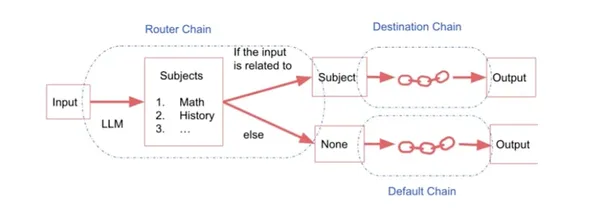

In [37]:
from IPython import display
from base64 import b64decode
base64_data = "UklGRuQhAABXRUJQVlA4INghAACQlgCdASpYAtEAPm0ylkkkIqIiIxCp4IANiWdu/BGVFC+IV2OdzOS2a31vj8+/98T/i+rH9OeiB6fvTF/WPQr+q/7he8h6N/9V6hn9u6kr0APLs9nn+3/+H0o///rUnlv+/dqn+x/ufj/4v/NXuDyMOpfMn+X/cv9t5hf9Twb9/2oL+ZfzD/M+gF8J/1O4z0X/gegR6g/VP+x/jfFS/wfQ768/633AP53/Y/9F61961+B/6PsA/0D+2f8z++/lV9NH99/9v9P6J/rb/0+4P/Pf7d/3ux56Tw4sWyfVxRorhLOJFm+nHwT6uKNFcJZxICHaE9jCqDi3QkaCdngOQBzwTAsK4s304629gRRkg5jXQOijA1WpKTYE4nLBkhdo4murQhrj4J9XFGh79ivWFQXM/zXgAZK7uHg8/ZsQeBoN1cnHogrlb5bJTvSCn9qZJUTJ2ehjF1EHkeRm6UEfBPq4kD2Vo6SbXYD85IBxngj+mK9tOJbe7efYEkaeeEtVyCAjFHRxOqmtyfAfAHoeOMxCZlZsiNdOdY/jKFxpxOKY0ttPenkxKo1KTvrjjEsiJubGbRR8ZKCPgh4LkA6Oa6WZkTVMSlrzcOsROOpymgpNk1wKq4YJDI4QFPN7hPQhAVlAXEeiZ8YTAbyV2sv60KyILonPOPK7b9DSOX7eCMTU9CS4ApHeYIUeFYROSpARmyRJ5nL9gjelHK6Ej9b6NS4iL4Foh9CdCpdJBZb3UKF3nlqRjvRM9LgI0PgXlCZ/I8338/9lDRgP96QQmev7CiztTNhfoQJmxm34UtS+OXsS+XF9duaNuJCIrwmRbP5mmjnalE+CE1sNqT+gHQoPuexk+NlZ5JIqR0sodLTCW4gEYvrJ0ilTaRNUceTEtZ35RrC9ZHtSzkIzARTgEJamXicliLaOFXJXQb/v/vKOUKELbSWTUQzzemoxBXveaXlljqV+pXnBUnnocA19Nm6j5cUelRAhWU8gKlw+HOqodBYSK0VW8hYO+fbh8BRavkvAtE3sNcLE0iRCl/A8L5DMH5SWedHIkhT/rD9ndJIWwTYBp/581mh2gMBuI2KEMimsuIM8U1Fme+SqNVAqotZZj9xmT0XXxKmpHdJ6TbJuoqLF8LA7r0pdnSRZvppzy9V9W2yX636ZyDt7qAe6nK6TkR9zwdhagaeROkFluk9S2lETW5+Cf2KvWA6rPj1oSu8/BNi4is458WJ0xkdKZ2j0aL74thttVBelRoiYWKojQxpKYKT2bCjOKNFb843ake1r+pmH8z0EcX6ri4sJc9YVcLPCn1boIpdl6SIDHjuczfndHqH7vVsDq6qk7C3ohq/p+tRsT1UTDY4P4jd8soRCXkX3wEMkNqeCeYIF/5ZfJ29y8fkRwj6agCtGe9abGzbX5Oe0kFtxskZtM2SQWcSMLP7iRwmxISZRnIDIEnpGLUyzHgv8PcWpNDJLAiF5Mds1t2nyLvHr4J9XFGiuEs4kWb6cdaIwipn5mghpNvjCPqfwiKGAmeNNY1vaxiS4midZ5UilT5ws4kWb6cfBPq4o0VwlnEioxOaDMtyW/sdfuk2nO/9wO1qugKuKNFcJZxIs304+CfVxRorhLOJFm+lQAP7/GwAAAAAM63OHcBuYk2QWvTamI8od/i8xrZQ3YI5GcMddGWcJmAeLUGSDbJwdNLE8Ij8QngSghXSOzSx/AYpL7/zN5UCBXJQGAvH5uTm12ZfNE9JnBkbwlYreEQMPD0lgLiwiOa8/Z7Siv0EaIA/GT4fMej5JOriME6OUOz9kA8aF8HJkQb5FyYlQFEI/cUO0eLnxosyTktmcPzN8Wr7AS9NGt1xF1xtcs2NxDo0Gn2sRrNj7L4tQwoEgMFlovS938DjDMFUUE6K0mThq9K6spCoFwBs1Jaj5W2ZpHwdgSr8U8IjW/1fw1rXmZwrxhvgplU0oa9JhAFZO4CJGj70+HKYSsoHqyNn1WrIBHTW4kegdpt0Mc/3qiyUfc6cY0/+IkddY6kaQ8qs4dBhO3DTH2O4dBc2cnPudx63CbDE6E2AcaIIsc9oI04xhaGzLyZFXYAcimuB+RcD//QD9j7oGpzQ/rQZ3jWdeJmwWKKCYABtTxmG7uc35omrlHtM7YGkkTJV/XkkAkgTxXBIS5R63iuuB3rcJ+oFikvh05OVug0UTPhbnTth9s56jplPcz1U/GUZzcFCjApMCo8LWThRlRTYdIk/IXPHi3OCwe8YKifAVxcTdWT/YaWkCEB7llf4kr57Pl25UbOk822zXOdhNZqE596EpqsR9PZTsZJ5TubJ5M59aQ0RMS5z59CATk57wCgLHzIqKPTCnhKOl7YSU7j8E3TkcpizRaJxhimQCNgtN7mo/V6FwZr63q1aGSruT0rMJGsI3Ui384BUd9OlCWdgeLbrg4FOqbcM74pg2N2YnCi7js6mNyeahA5lbDytihHfz9eUK+VlrarVn01ZQj6/tx35RgyMlZ9rb0cyk1/MawYsFUaAk9y1lbQB5/9bDT7G0z6DHqM1rxjG2XOULPfSwVEkkp9LincJQI6L72d4zdTM25k07J2SnB7nqe8arUy//4QsmNpOBk33tCNrAJhU1G+snCjpf/30qffd2JAnkNUyT4E6rIs6tTCZdOOZU2o/qbvsuiHUK39YFULFCFUpGlqJ12JVHEmyZOoKO9/qFWdPobqDM8ygJqh/5qfHiDpMeeioYBQvURA8vvMitM2XBwrKUaLtFXgEWjBn0dOI8JJpr+FVeLXzoDf4PZMPsd7VLGWKfx3ThDLdTaUxPwjCskUiHvPAe+2H9ImnlJjcBykWtlUNh5vOlzy9AyN43vncvkEfoXkZMuyaScyYZzzbVi61JfFfLHduFJLvQogNp9mnuZAL0wMI4FxbFEYy+OgtLby8IIPwy/zCL7tJOdocNOX1kq8fx80Sf2UOqiZyMkULRfWfKRtrDdZGJrQSVLluyIFh/kk/avVLyu1d4wQrQAX+LQocUVz6xDSvYw6r3Ol5RADauP961fx3p2kUR9h40WO2p26weHOlTffap3rhlweunjW0/SPm8pxADEC9R1ixgcwXHzUbkq4T5mU4ECRJqrLRq521Tzi4N1GrWiEz7visnrm1XUoKRlOBAkNoQMiG5vg29fJABpqEi+5RV4Q5z67P0TYberWPozdkzPQFegTSLMP1spii2vRLiz6U/HrxHl1+kGw3rnSLhiJFcCCeh6hS8DM4E6uQ58GGQtSC6L8C5n2WxkhylvmjjbkyrSaXekb8CscyM2fQqcvU4S1A+1h9X0OQPal77Blc3QWmF6/n139nGjvLxDGqrpn92VT/b7siE0LL7fYbaoW7o6aL6tuqwL9y+BxPPoL5kTfght5+tNxZ+fwnswex0vbRw/1Dst9MVRcbcglBkcQoIOFq8ag8Uicnl/5oPrmYDNPCBxaucFq7iUhrQmBP/f1gMuqUwabz1l8TwIWO/grTLi293BR4RKXuLhrBwQ9LvglJwwe70trczt4MQFq4s2qsdxo0sVhD5Fn5jn939vKx6LTrwnkEVxYG4ylqNZI+iybo8sn6Y4Ll5Ne1dCWRbfVHq7lonZKhjx0txoB1+ic5LpMm4B3xUNUdrN4psTKwZqf3Ts/o/nl1yrCoz4hTJ9diwmPc3T1gyEU9o0mDR2Mk6cc/yfQVlYLXswECiXzHxAgJi6eF9BbkZHSNDfDQuAt7qu5oZdn62O7oxOzk7dQw2BV5j9py8pXH70OzFXq3/gjf3172u0kFI2WlUCFeqkSGcmTi5YCkAAA7Ef2zMiJrjEAA30SjFW3d68lK/GDE+Dt0eqavtxWEM8kBXpTBb2QFqMqO5gzvx6XXjBQlnGFd4OxATSF04vLylk/cb5AacTuHyNF2+IFXFxBGFm37txBtsQdgoflmt6L3Bktr+sz+TPk/ObqH/TJdwK4PLj4F2TmsZyQpnOCaEQqEpiUOj1L/wKAbXoaAjc4Ax1IQbpPERucOqV7wOG++kjCYkXgrW4mW6uHiUkJzX7RXVlyCZx4ZEfOXXVPRsAAJVO39XvvSD3migzie8s28Bq5oMug2kf8EFbZa72PVHap1+QLXWGQF5+tupakaPuliKn5m95gyRNRCDXfJWrt2FytNVfh7Y4jd3vWxuivYA9LeSjOL3eHDT6dij7YyjxNgAq17KDJpNmPrfZpJ8VUSGx4T/zHbsepi/ztgSUBbTh984Swc2SEnXT89yI5UuDur4ysZX8ZCqRr/3vtumFCJiC9LKAHN/Sl8Yi/6hXXrxnlVf37XgrxX7FRvk7GQFJ6eUscwUtyDgEuSnHIVbsJLxj6CfY479hwVDhNxdXazzNVzlxfoDrZqh6nHzmUpP839BunlvIhmtsdqqAR/4yaAc++faQF7aykPh385H8Qzr8qi8sSMLWx9ImNWCd2PP9z4M47auWXbPiuEuEpkdXlw74dmDJYNpLtyAutwC3xX4TQ7alTnl0V5768XWOZaq+k4mQHtIPXt6mdgwv+jnZRfOpGHDNrXCttBNcKMOnPOi/cAMXLpke4BcW0zNtejHvDt10z/Jmgh85zJR6AnzwPHkZ+agxCMfqT63dx4S0Xjwm9RJlrluJpVjcucMY3sVKvJ//aQtrHoO7Q5jHHZkcGZs04iCbpC3wH4G2/ucFnDUSiB6o+SvBqvcog+IcABdDwBI92YMYWTdYxveKvv0UnFhrTHaREsl4lHXSFf/RoKYCrTr76JfC2HdYD6U69pJlJy6Z9QhXHFNTIZWv8D15kWsbmVZqNAmO+9PwKY2CtSgTcaFOfAEdrlrskGCDYBCD3TUz6H3HoHKH0a5zHd0ZyjtONrIQmIG1WxlYzhg+DeUuRxHhT8l0diHvqaNP/DHitj/4VAQ3wdZ/V9zKbLlAcM24/Gnv55xz7iSn/LXdOZK2BAjp2Cg7G5mkdnrVA3/B/EPHdhb6vsLMk/H9zs2jyRNIq2RWckg8+O52jkSHCTV876wCSdeQzIYMvogUmj7Bzf7ZcrN2vAd+UFZpTkefu8CBNrhHT9W6Pv8gh6VaWCDmyP8Rq/zI2IXNE/l55zcfKRXyMf/aSKoDAuXFKQnzZGOxGJuVtBbC6cpxG4KE8TGpqA7aQTRUp02+iwqccmKf0OAKj3w2k9IlQ+Kx2Rg8/8FAHot6aQ+7BDxwrByegJNDn7yOjaSEYlbxAfT7E83R+Q9HZ3kAbEvS8HavHPFct9GkbY98qCjqr/Z5tsDnzx7QqUvMZL//bhSn7WDMNtoy9qsub7A9xpQ2f0p6YO1Uq5z8pX98l/i0ih9/h0NZKav2dlf4aO6z8VJ1Qr8FHx/C+KT1DEryZNY6y/+M0vKKTZ6jPW9j51PX0qVXG6fKJPgEUuVgW/sKqmfbLCAh+R5r18po9cS6kKHSxmFhxobxHx2G54BSsLzxy+MZ8KGDqeqpY3i/bR2DaqL8vTs9/8w6fqv6/L1XgzkV6MuUULg85WjLnUTrccXBp2Usg2Pu8tOVAxvMk1FbEsUYUdYCA/An8GpTdJxCV6164OgBPPTBwX0CrdxPVxQ6QFXVaCjvz5s7+bvGL+X27xKHWZtoad3UDFOqMXYtwHaDiWOEET4h1IYWiZrXXKVS4wqHbwpyD+TnjdkPU/YtJwcIi4it0++6/e7exHbhx2AszxdqBI1p578KERWjczqzUngBfWR6PEXmM0tzpdmOVpGpAX+1m4tUG6oA5Lf2nb8T4QQQY4/KTWFXoZGwfAMha97Bf5M1Q1fKXs0VBXtcweITMUWrL1jB5GKEE13M9755OCQrrbOkejZ9djIC9eSloSLfDtbUr47Plt3Q46w+oweaWLmEpXz4c4b+3bcpQSpHjUUbARCiEgJd5ZbMmF/imTorAKDJYQ5dbMN7dNvREY2ixAL7tkwOmkShe596TqvAcGw8q51kVDohgbNe8Ik3VR2X33+xK5mwDeITYYyc8h5P4gniI2GD2NqvlzhmJtdiT5TqyuSJDSkyH4kxIu2YTlcnL6La7M9O/2A7USYXVw5dHy275MdMvfxiZp/DsNG74yabLS6RS16hfCPQsnHAUtHpxnalZSG/dAijlXsp7PKDV0qFSSlRl+656sRwhVtXK1IP6tePxp+4ujU6G7wE9Dz2ilnucvNMXsoqyFjR61cmQmjjyoE0yfXHYIG9ImYmZ2AQb6kGhHY5X/XreMuDo/1HNlEcCMjKm5D6oNgIa3Y3JxShQfek97VTEeYfWXekpLm//hnpVS3Xwzn6dFjiEvqH/tvBeY3b4AUIuNldGuBBG+FPI60a7Gr3RGCeKXOEj6LaTJ35/zUfmTGOYik9QP64GwbMcNA717P7M2lea9tc+s7e1/SYVGk3bXZkkVGb0kjkwDBAjJmr9KoM4kHX6mV3smlTURpiAFCwXt4QomsTnh/T6vM2ht+fWf1Er0rGlEqOY0zQnYcKziFNx8cyiJTp+pNPBPKoulC41B8edHPDYhTYhRObE/n357wWEDS6d4IA4AunbYAfDYPU4Ca6+wSp5qHmIfAhGKOGTC/gqYsdE+kL4/Ad5gizJM8kbrokzahqHMaCGdcBUVKECwbroL7fAx/n4o6yoznHuftb+26/5bNKLXqz40XiBWfmT3afx58U1vQYcM3ui+LyYUZOFuXKfHQ6yxc4iRfIG7/XTmGa2ahKas+ER/l890+QVWn8/NtOaMsP86AdzT5PpEQMH9dXBZ7Vo+ruyY23TeuA0WfZCBeNgCplwnWQl/pF3C/JOuCEscXBBwkQoyEpa41ZxG3HLMZgsDZ6VJLLzUWu5kJV751xSRm+G2Rqf136r1OQBMiHVPYwbmJBdTXdklDycrI9rDm1xD0TiwG/v6ggSQpqq+Ly8guvFNVoHUQVR3ELCNur4Tjaw94k/JQZnUYp/hMpwDjwF1iN6TBUpeRohemUs9syKVorXmgcAhcgURNp+/L9RZP9YSf6cnJKAdUyI6hoGdwHKNZgLjKKlNzXxcpAv7238bzpu37E9qEHyml6FLRv32PWKBadq0XUboFo5koWo6jTBlScPi5ceBQdrRAvjBW16g+geo32K1wAbE+MfIROK8n/HPoe5gqMYMLDvdZP9dMknAOYPeAis9woLJs/8JIcp4RxCTrnOFhYAXS+enBs6AA1x1e+S5as/JloTWLiRJqp23SiLXo341ZSUC0CqKvzntQv3zj4nTOgNqQnLUPBchobEMOg/gL09KJP+2E6QTOi6oWl8sQ2ZxpIBuN1h+agNeSNsNvZz5bceL8QVKb/bfpyLxB9bVdkzdUvq2jjuFPRdbDeyEXWNp5i0sIBHMzwUbE8gq7dUAr78lim0yPYG2d7MYc0zKYRyNzUGNxJqPBwFxPgDOY8isNgcyV0nrwY+kcjPuj8a91SKNmREspXPuz5YYKF4EEzerSXLAihWEOv5owiMDHoBw0epU7ruV4QHiMJk6/rXhiUp+NAYKn/PhQMyMlc7jCtBvfgDbtS98+2DTyZhn3Zq2OM6wDdESwgDkbQ1KBhb7eNuM7uqO+bzDW88iKt9ieBaOkr2sDTro6yqkjSiaRAf54poCKho7VpizHC2MzGaOAPNN5wmzS1wd0tTbB+0uFGz/c4sSpjV0GbazyKsbRJbdcb4z94lrSTPBRi8HqI3z1/6E/ZsjXEIsmK/SKF5USujeKzyOB8m1XAzIQPOIgTKYxGDTCZp4XTmlf6PonTcNJyYD5X/p3zERo2ZGjHi5kKYsiWKBvjP7gdWl/3tSXDgUT1kO2i19wTmUTr38gNZSxv9QFraEQLH7+I8PfTp1T80a2x5zrI3MKEDPwWsikZvCULKzO4j6IXDcT/oFsK0D+0QO5OpRcXyV7F/rpzv+IkGZwqQfKRVf7P4T/MgP4uP8Fl00+RXT1aMAf/73s5w1Git7zgxrlo+YTQwslr/sS+d60zqp0OvHg9041qgpTIROed1QoxUupUoVKEv/4BgXzQt4rIL8MP364ehOmYjXDGIYOBr7QFpWUDMiooCMW5scjEEehHnA/DTBzrPAQUubFZJa82wUWmOz5MAFZc1iBB6ekZ5+7AduYjDDtKcDx/FoSB56KZRggmGGVnaxK6XyQQAaMfRLG+spVCSdVIb0XmUV3YM35AIBCll9YqQVnM8qW+0EvcCVNrnbQfUXQEPz/ZP8j2VxkoIPMla8kxCD6paT2iNDAaz+Lj6Ltn+caXeezbrEFJfrdhAhJviVbxel9QI0P7V/tDrRN7FVDvL31nje7VCCfJW8Vah0QR+Xe4JUIpv2oUFs7Vcj28YAxBJoAd59MWH6eAsS8XxTHvzRwlDCPNYB8FwIXbBIN9PScTjtvPApxKL+6cGFPnL08pXgzfwRIrv7qCRe9/JEKjeYue2amy+WWsurJaiLnL6gYvUzJozOLDiHTLc0r6FmLImJyimSQBm4J12mNsSHGgHrXJXOjHwk3BAKnTL32IXFDHoRDp65X3zVF/gtUG4XmDw//fYDi9b5emimFYmnw2vjN5mB0oe2xeibz5JwXuU/lhkGpDTLMyAb8Hooax3TG5L5/JnR4nYovzgEEuRWJztfy+tRcGLOP3IR5Nf1eptnre+YD4uFXcpUy0OZsuqMxcyMOQDuLbgQY7OhJpp51qW9D19p5MlIkjsYYD23e3NnvsmRNuaX0EXdzcLxPlu4q2a7WC+frZ/FA5chTRV+QsiC2xXIGkTwA2SuxqUJi2ciSptJ/CjAJauP5btp9qhzloPFCjhxSGv3VrzJAdL4P89d2vA1W8TV89HQlKtg5pQTV+fWO2hm6bxdxR6Pn0ZEhuNE4YeKUG3TVeAQhXOKqqr+DHMpc6xlFUiVZWAyIbf/nWSz63dUCJ0F6WSobCn9MTPdTAXXGsBiA2EKrHB1tfTu9nm/6VJeSvbymsFKE8GxbD0e7LhSg/kH3yun1HLFPT4aM8rYUF7JsKY7E834uZpw3WbPfPEEpZDPRgCpOxjNOXJ56v8jPUEzZOR69FwWobnO/KOgbmTrTjzLrHPv34iflT+BPVMizLLLY+Jbdan0V57PSkPR6FcWdN3Poajkb08Sf502MyjqlPNVjlrZAPo9HJQ19WUEINPntH40Wd9aoDNoXdR85XRPtJ/55y/QBKJhXmMkrKucseXOAm6DKuYyLUBckcX4AdBOCCpqL5C13wpfmkkejdbliNxQjAwRw+4Mf5YCCeP9GqA3I1btx6CdGTmee6l6w9bXaGoprsPY8i91OusoyXakH+Lho9Bn/hyewkvabKec+zVekNam/WLFa8N1RzFkBftfdcZ+OlHM3iXkWW/kXwPb1P+dlBJ/5/oOLGToRQDsT9YNdY/kF6phzFGD+P81L2j8Ddkq1MvRw1eA4F8SdSqSaUjFFWLPQE5/pc6Wy9BABCWm8DZjLRGopVXsuoZYiq1NQBc/Hcakmk/uVkowPXaqwzjTl4m4H4lhYO1nW8zjnKyFR7yVWfIAsYItBOc2Hk2tF4367pcxo41DEmgY07y+uNAe39Rw0t9ciEC1SxFxkTFs4VCO9xT+zCyzDzIDXS5IuUgtl+6afFxNezowxWhmivMm0uzp5yUe3fORLttZr/I72a2m6AZxTGo+Yo+YXRf2eMtqiBitp4Ozw2auJzNd2RlZXkWIHrBE98RaipsEmQjbwTCrQ7wsnXNhyCjk72EVNYXg7Z/uSZ8kCFhSFGNQt0AUM1Kog8O8nHQNUrg+qR4RfbAUQ5emge1OqsXJ+ASHpu4JMmuK7uDFlw69om3SQfP5dk3VoakwGF7cASUq6AFtil5xPHQ4t9lwTUvf+NTO/DMsUAUPWrDG5lm8G0gGaWdL5FIMBMRzyk/SgA9v2ZPFKfF3Wt439OQFCjJmcC9L1OTvi8H+wizCp0TcSEeKT7t/VDnHfHZ7kHFxIyWYfmdau/s5U9EQCYkQSUqUw+rW0qLQ9p4w8mW5IN5Az9afKU30D001zFpTRPK156DLTUoh8XWVo4+ly8yeu6hn54dBSKNyarRx+hvKbNzyEve9LxVgDRUrxaHCLWHINsuTSZX6IPGpxLFMP1hTpumdOTpbyI9Gq1iiIBV56W9wuMkb7k+lV8+cpcsWUSKMtyyfkNss6qE9YzFsWsTREWeOFzM+1TjUC57jINP2BqxJj2hbZlPLQQ6clnrbvpRr9PYCInPM6yjpFJLyu2Ejh//+XoLWMHOFpToB4peXoLdCbcG5HFJK+1tWuXVn3F7npcUBw/sU4r+oaOxUJE4+tDaylHFQJYJVnAznta/k2960+TdzfZo48wuRTYhGLNpWJhhj/KpIMhRTY6vEvO8S6EUA9AX5e3Z0sQiUSHhtkzoXR5/b4m+u3WTG1cZExM63nN92XmqwnkG01cWSMALNsBO7l8ykYFtnyIldyX8gj1yrm3PkvtiXSZNkD1f6Nhj/eRAqqQD9b/5CBh+xp2/ygf1rebrTY0W2BtGYd0yhJjZPcqVX4LSBoX/h6PrhlqQcZp5Nnom0YvztihcsTA7DIoA2GvravblfhX8dE1++Am8CZ5tbWFjJ8TUVX78mH1CFawYZr/4MLAk4Yxzp+06e66Zt7KyJRFlvl3K7wK/N1yv761mEsRUA3tk4izjCMrO8oywFbBh9X9Y+MuvgXDd8v0if1mx+Se/IxfwbImDt/CIEA2JGaiXlaZIxLwEEYlPJoANi2VB1G3sAkTZfNKfyyl1lL3HKmcfZ5wlYCFaJfgcMOrwu6hAjYVjXV/OYhJweiNLeQcDWxEh1z9AAAAAAFxVGnLLRhbvIsRx/6bleab9J0gBHzE6pioDzpR2I9WLkTOWkYUMbW+qNZoPlOrCDA4GmPiOpXiErBLI3oWARO5XVCA/NInQJYF53YT1icpLvyg2CZ1xqtSyk7Sa1Jj8q8tQjIGI502vVQheukozcusyS4Zr6WJfI1KyRGji7jPf12H7oXkR295qOunxoNRSNYqnyIQjS9N/VrMGHww8E/S2+kBssRup6+WtcmsqGOYKQFTTKcs0/bSb3OII7RAR8gIbeWi2oqFjmbEemjBBb3hZwfMAAAxrQL/kCRz2uEHPRhCr6FLMGOpMIlmk3RDsyNw4qlcoVyxUv55Rcb18M6b2VUv+3Q4FaX9zwjOkLZSTkWYiMQjXcx9IGB5dRAisEPNJ7F4v3jwys44woo08ADKmVPgyo4RT8kNbwzUfitFjfIWarsLkO07pf3M0tFxfjzVMpQBiVsvRvyiC+Y5fci5CHBOS/99J8+k/4ZzE7LMAfmLq6wZJ7Pt/4bwn8eNmbfmIyB7Hxw1Bw5fr2+PxPX1nErRYBY70wfY460z/thF51gp9Ya3GQY6XwCMNi1ZNarD9I7wLSITTm6avEaa3K8L5iMDGzjahnqGaBg/xKNLDqIosK/BkAAAA1JlSGNc5KIWn0T8ijsQJeiDjDyn7q1s0YLUbNtZAjZqPY0H7bMWUesKVrMXOu/jFuBZZlj5fp4yAseJyq86sa0hGqoFK0WVzAONdKtsdMC66OszS/XFbGHKNhjSIrpBKTq8pRRGU4mc1uePWbblKFQArZSrTHbUVgRqkmTtyHHrTNyQIu/4OBqIAAAAAAAAAA="

display.Image(b64decode(base64_data))

### Small sub-chains

In [24]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [25]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]

In [26]:
# This is a high-level chain that allows you to select different prompts dynamically based on the input. It's used when you have multiple prompts or tasks and need to route the input to the appropriate one.
from langchain.chains.router import MultiPromptChain
# A specific type of chain that routes inputs to different LLMs or prompts based on the content of the input. It acts as a decision-maker, determining which path the input should take within the chain.
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [27]:
llm = ChatOpenAI(temperature=0, model=llm_model)

In [28]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

### Router chain

LangChain will use the default chain when the router chain can't make the decision which sub-chain should use.

In [29]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [30]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [31]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [32]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [33]:
chain.run("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


"Black body radiation refers to the electromagnetic radiation emitted by a perfect black body, which is an idealized physical body that absorbs all incident electromagnetic radiation and emits radiation at all frequencies. The radiation emitted by a black body depends only on its temperature and follows a specific distribution known as Planck's law. This type of radiation is important in understanding concepts such as thermal radiation and the behavior of objects at different temperatures."

In [34]:
chain.run("what is 2 + 2")



> Entering new MultiPromptChain chain...
math: {'input': 'what is 2 + 2'}
> Finished chain.


'The answer to 2 + 2 is 4.'

In [40]:
chain.run("Do you know where is London?")



> Entering new MultiPromptChain chain...
None: {'input': 'Do you know where is London?'}
> Finished chain.


'Yes, London is the capital city of England and the United Kingdom. It is located in the southeastern part of England, along the River Thames.'